## 1. Data Preparation

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from scipy import stats
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')


## 2. Exploratory Data Analysis (EDA)

In [2]:
df=pd.read_csv("Education-services-with-station-access_loc.csv", low_memory=False)

pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
pd.set_option("display.max_info_columns", 200) 

## 3. Visualization & Insights

In [3]:
df.head() 

,ServiceApprovalNumber,Provider Approval Number,ServiceName,ProviderLegalName,ServiceType,ServiceAddress,Suburb,State,Postcode,Phone,Fax,Conditions on Approval,NumberOfApprovedPlaces,ServiceApprovalGrantedDate,QualityArea1Rating,QualityArea2Rating,QualityArea3Rating,QualityArea4Rating,QualityArea5Rating,QualityArea6Rating,QualityArea7Rating,OverallRating,RatingsIssued,PreviousQualityArea1Rating,PreviousQualityArea2Rating,PreviousQualityArea3Rating,PreviousQualityArea4Rating,PreviousQualityArea5Rating,PreviousQualityArea6Rating,PreviousQualityArea7Rating,PreviousOverallRating,PreviousRatingsIssued,Last Service Approval Transfer Date,Long Day Care,Preschool/Kindergarten - Part of a School,Preschool/Kindergarten - Stand alone,Outside school Hours Care - After School,Outside school Hours Care - Before School,Outside school Hours Care - Vacation Care,Other,Annual Monday Start Time,Annual Monday End Time,Annual Tuesday Start Time,Annual Tuesday End Time,Annual Wednesday Start Time,Annual Wednesday End Time,Annual Thursday Start Time,Annual Thursday End Time,Annual Friday Start Time,Annual Friday End Time,Annual Saturday Start Time,Annual Saturday End Time,Annual Sunday Start Time,Annual Sunday End Time,School Terms Only Session 1 Monday Start Time,School Terms Only Session 1 Monday End Time,School Terms Only Session 1 Tuesday Start Time,School Terms Only Session 1 Tuesday End Time,School Terms Only Session1 Wednesday Start Time,School Terms Only Session1 Wednesday End Time,School Terms Only Session1 Thursday Start Time,School Terms Only Session1 Thursday End Time,School Terms Only Session 1 Friday Start Time,School Terms Only Session 1 Friday End Time,School Terms Only Session 1 Saturday Start Time,School Terms Only Session 1 Saturday End Time,School Terms Only Session1 Sunday Start Time,School Terms Only Session 1 Sunday End Time,School Terms Only Session 2 Monday Start Time,School Terms Only Session 2 Monday End Time,School Terms Only Session 2 Tuesday Start Time,School Terms Only Session 2 Tuesday End Time,School Terms Only Session 2 Wednesday Start Time,School Terms Only Session 2 Wednesday End Time,School Terms Only Session 2 Thursday Start Time,School Terms Only Session2 Thursday End Time,School Terms Only Session 2 Friday Start Time,School Terms Only Session 2 Friday End Time,School Terms Only Session 2 Saturday Start Time,School Terms Only Session 2 Saturday End Time,School Terms Only Session 2 Sunday Start Time,School Terms Only Session 2 Sunday End Time,Holiday Care Monday Start Time,Holiday Care Monday End Time,Holiday Care Tuesday Start Time,Holiday Care Tuesday End Time,Holiday Care Wednesday Start Time,Holiday Care Wednesday End Time,Holiday Care Thursday Start Time,Holiday Care Thursday End Time,Holiday Care Friday Start Time,Holiday Care Friday End Time,Holiday Care Saturday Start Time,Holiday Care Saturday End Time,Holiday Care Sunday Start Time,Holiday Care Sunday End Time,Temporarily Closed,FullAddress,geometry,ClosestTrainStation,ClosestBusStation,DistanceToTrainStation_km,DistanceToBusStation_km
0,SE-00000002,PR-00000898,Community Kids Waterford Early Education Centre,G8 Education Limited,Centre-Based Care,8-10 Allora St,WATERFORD WEST,QLD,4133.0,0732009852,NaN,This service is approved to provide education ...,60.0,03/11/2010,Meeting NQS,Meeting NQS,Meeting NQS,Meeting NQS,Meeting NQS,Meeting NQS,Meeting NQS,Meeting NQS,Sep 2023,Exceeding NQS,Meeting NQS,Exceeding NQS,Meeting NQS,Exceeding NQS,Exceeding NQS,Meeting NQS,Exceeding NQS,Sep 2016,NaN,Yes,No,Yes,No,No,No,No,06:15:00,18:15:00,06:15:00,18:15:00,06:15:00,18:15:00,06:15:00,18:15:00,06:15:00,18:15:00,NaN,NaN,NaN,NaN,15:00,18:15,15:00,18:15,15:00,18:15,15:00,18:15,15:00,18:15,NaN,NaN,NaN,NaN,06:15:00,08:30:00,06:15:00,08:30:00,06:15:00,08:30:00,06:15:00,08:30:00,06:15:00,08:30:00,NaN,NaN,NaN,NaN,06:15:00,18:15:00,06:15:00,18:15:00,06:15:00,18:15:00,06:15:00,18:15:00,06:15:00,18:15:00,NaN,NaN,NaN,NaN,No,"8-10 Allora St, WATERFORD WEST, QLD, 4133","c(153.1339

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17663 entries, 0 to 17662
Data columns (total 103 columns):
 #    Column                                            Non-Null Count  Dtype  
---   ------                                            --------------  -----  
 0    ServiceApprovalNumber                             17663 non-null  object 
 1    Provider Approval Number                          17663 non-null  object 
 2    ServiceName                                       17663 non-null  object 
 3    ProviderLegalName                                 17556 non-null  object 
 4    ServiceType                                       17663 non-null  object 
 5    ServiceAddress                                    17653 non-null  object 
 6    Suburb                                            17653 non-null  object 
 7    State                                             17653 non-null  object 
 8    Postcode                                          17653 non-null  float64
 9    Phon

In [43]:
df.describe(include='all') 

,ServiceApprovalNumber,Provider Approval Number,ServiceName,ProviderLegalName,ServiceType,ServiceAddress,Suburb,State,Postcode,Phone,Fax,Conditions on Approval,NumberOfApprovedPlaces,ServiceApprovalGrantedDate,QualityArea1Rating,QualityArea2Rating,QualityArea3Rating,QualityArea4Rating,QualityArea5Rating,QualityArea6Rating,QualityArea7Rating,OverallRating,RatingsIssued,PreviousQualityArea1Rating,PreviousQualityArea2Rating,PreviousQualityArea3Rating,PreviousQualityArea4Rating,PreviousQualityArea5Rating,PreviousQualityArea6Rating,PreviousQualityArea7Rating,PreviousOverallRating,PreviousRatingsIssued,Last Service Approval Transfer Date,Long Day Care,Preschool/Kindergarten - Part of a School,Preschool/Kindergarten - Stand alone,Outside school Hours Care - After School,Outside school Hours Care - Before School,Outside school Hours Care - Vacation Care,Other,Annual Monday Start Time,Annual Monday End Time,Annual Tuesday Start Time,Annual Tuesday End Time,Annual Wednesday Start Time,Annual Wednesday End Time,Annual Thursday Start Time,Annual Thursday End Time,Annual Friday Start Time,Annual Friday End Time,Annual Saturday Start Time,Annual Saturday End Time,Annual Sunday Start Time,Annual Sunday End Time,School Terms Only Session 1 Monday Start Time,School Terms Only Session 1 Monday End Time,School Terms Only Session 1 Tuesday Start Time,School Terms Only Session 1 Tuesday End Time,School Terms Only Session1 Wednesday Start Time,School Terms Only Session1 Wednesday End Time,School Terms Only Session1 Thursday Start Time,School Terms Only Session1 Thursday End Time,School Terms Only Session 1 Friday Start Time,School Terms Only Session 1 Friday End Time,School Terms Only Session 1 Saturday Start Time,School Terms Only Session 1 Saturday End Time,School Terms Only Session1 Sunday Start Time,School Terms Only Session 1 Sunday End Time,School Terms Only Session 2 Monday Start Time,School Terms Only Session 2 Monday End Time,School Terms Only Session 2 Tuesday Start Time,School Terms Only Session 2 Tuesday End Time,School Terms Only Session 2 Wednesday Start Time,School Terms Only Session 2 Wednesday End Time,School Terms Only Session 2 Thursday Start Time,School Terms Only Session2 Thursday End Time,School Terms Only Session 2 Friday Start Time,School Terms Only Session 2 Friday End Time,School Terms Only Session 2 Saturday Start Time,School Terms Only Session 2 Saturday End Time,School Terms Only Session 2 Sunday Start Time,School Terms Only Session 2 Sunday End Time,Holiday Care Monday Start Time,Holiday Care Monday End Time,Holiday Care Tuesday Start Time,Holiday Care Tuesday End Time,Holiday Care Wednesday Start Time,Holiday Care Wednesday End Time,Holiday Care Thursday Start Time,Holiday Care Thursday End Time,Holiday Care Friday Start Time,Holiday Care Friday End Time,Holiday Care Saturday Start Time,Holiday Care Saturday End Time,Holiday Care Sunday Start Time,Holiday Care Sunday End Time,Temporarily Closed,FullAddress,geometry,ClosestTrainStation,ClosestBusStation,DistanceToTrainStation_km,DistanceToBusStation_km
count,17663,17663,17663,17556,17663,17653,17653,17653,17653.000000,16918,5237,6247,17246.000000,17662,16336,16336,16336,16336,16336,16336,16336,16336,16336,13144,13144,13144,13144,13144,13144,13144,13144,13144,5352,17663,17663,17663,17663,17663,17663,17663,10641,10642,10686,10688,10689,10690,10678,10679,10612,10613,224,223,129,128,7268,7268,7448,7448,7351,7351,7249,7249,6825,6825,39,39,24,24,5525,5523,5629,5627,5642,5640,5665,5663,5540,5538,19,19,14,14,4782,4781,4792,4791,4790,4789,4788,4786,4764,4763,89,89,59,59,17663,17663,17663,17663,17663,17663.000000,17663.000000
unique,17663,7186,17441,7096,2,17210,4043,8,NaN,15195,4826,3246,NaN,4301,4,4,5,5,5,4,5,5,130,4,4,4,4,4,4,4,4,146,1630,2,2,2,2,2,2,2,55,67,55,64,57,69,54,70,59,71,13,25,12,15,95,109,96,113,94,111,93,117,92,113,10,16,9,13,78,88,79,89,83,92,85,92,77,95,6,11,5,9,29,36,29,36,30,36,30,36,32,38,11,18,9,11,1,17309,16886,1102,147,NaN,NaN
top,SE-00000002,PR-00001129,

In [44]:
df.isnull().sum()

ServiceApprovalNumber                                   0
Provider Approval Number                                0
ServiceName                                             0
ProviderLegalName                                     107
ServiceType                                             0
ServiceAddress                                         10
Suburb                                                 10
State                                                  10
Postcode                                               10
Phone                                                 745
Fax                                                 12426
Conditions on Approval                              11416
NumberOfApprovedPlaces                                417
ServiceApprovalGrantedDate                              1
QualityArea1Rating                                   1327
QualityArea2Rating                                   1327
QualityArea3Rating                                   1327
QualityArea4Ra

In [46]:
df['OverallRating'].value_counts()

OverallRating
Meeting NQS                         11358
Exceeding NQS                        3465
Working Towards NQS                  1473
Excellent                              27
Significant Improvement Required       13
Name: count, dtype: int64

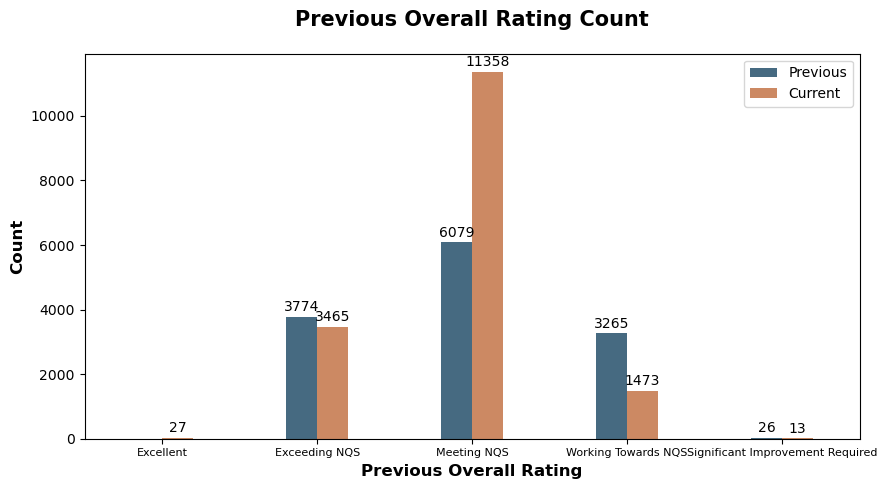

In [47]:
quality_rating = ['Excellent','Exceeding NQS', 'Meeting NQS', 'Working Towards NQS', 'Significant Improvement Required']

plt.figure(figsize=(10,5))

df_melted = df.melt(
    value_vars=['PreviousOverallRating', 'OverallRating' ],
    var_name='OverallRating',
    value_name='Rating'
)

ax = sns.countplot( data=df_melted, x='Rating', hue='OverallRating', order = quality_rating,  palette=['#3C6C8B','#DD8452'], width=0.4 )

for i in ax.containers:
    ax.bar_label(i, fontsize=10, padding=2)

plt.xlabel('Previous Overall Rating', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title("Previous Overall Rating Count", fontsize=15, fontweight='bold', pad=20)
plt.legend(labels=['Previous', 'Current'])

plt.xticks(fontsize=8)
plt.show()

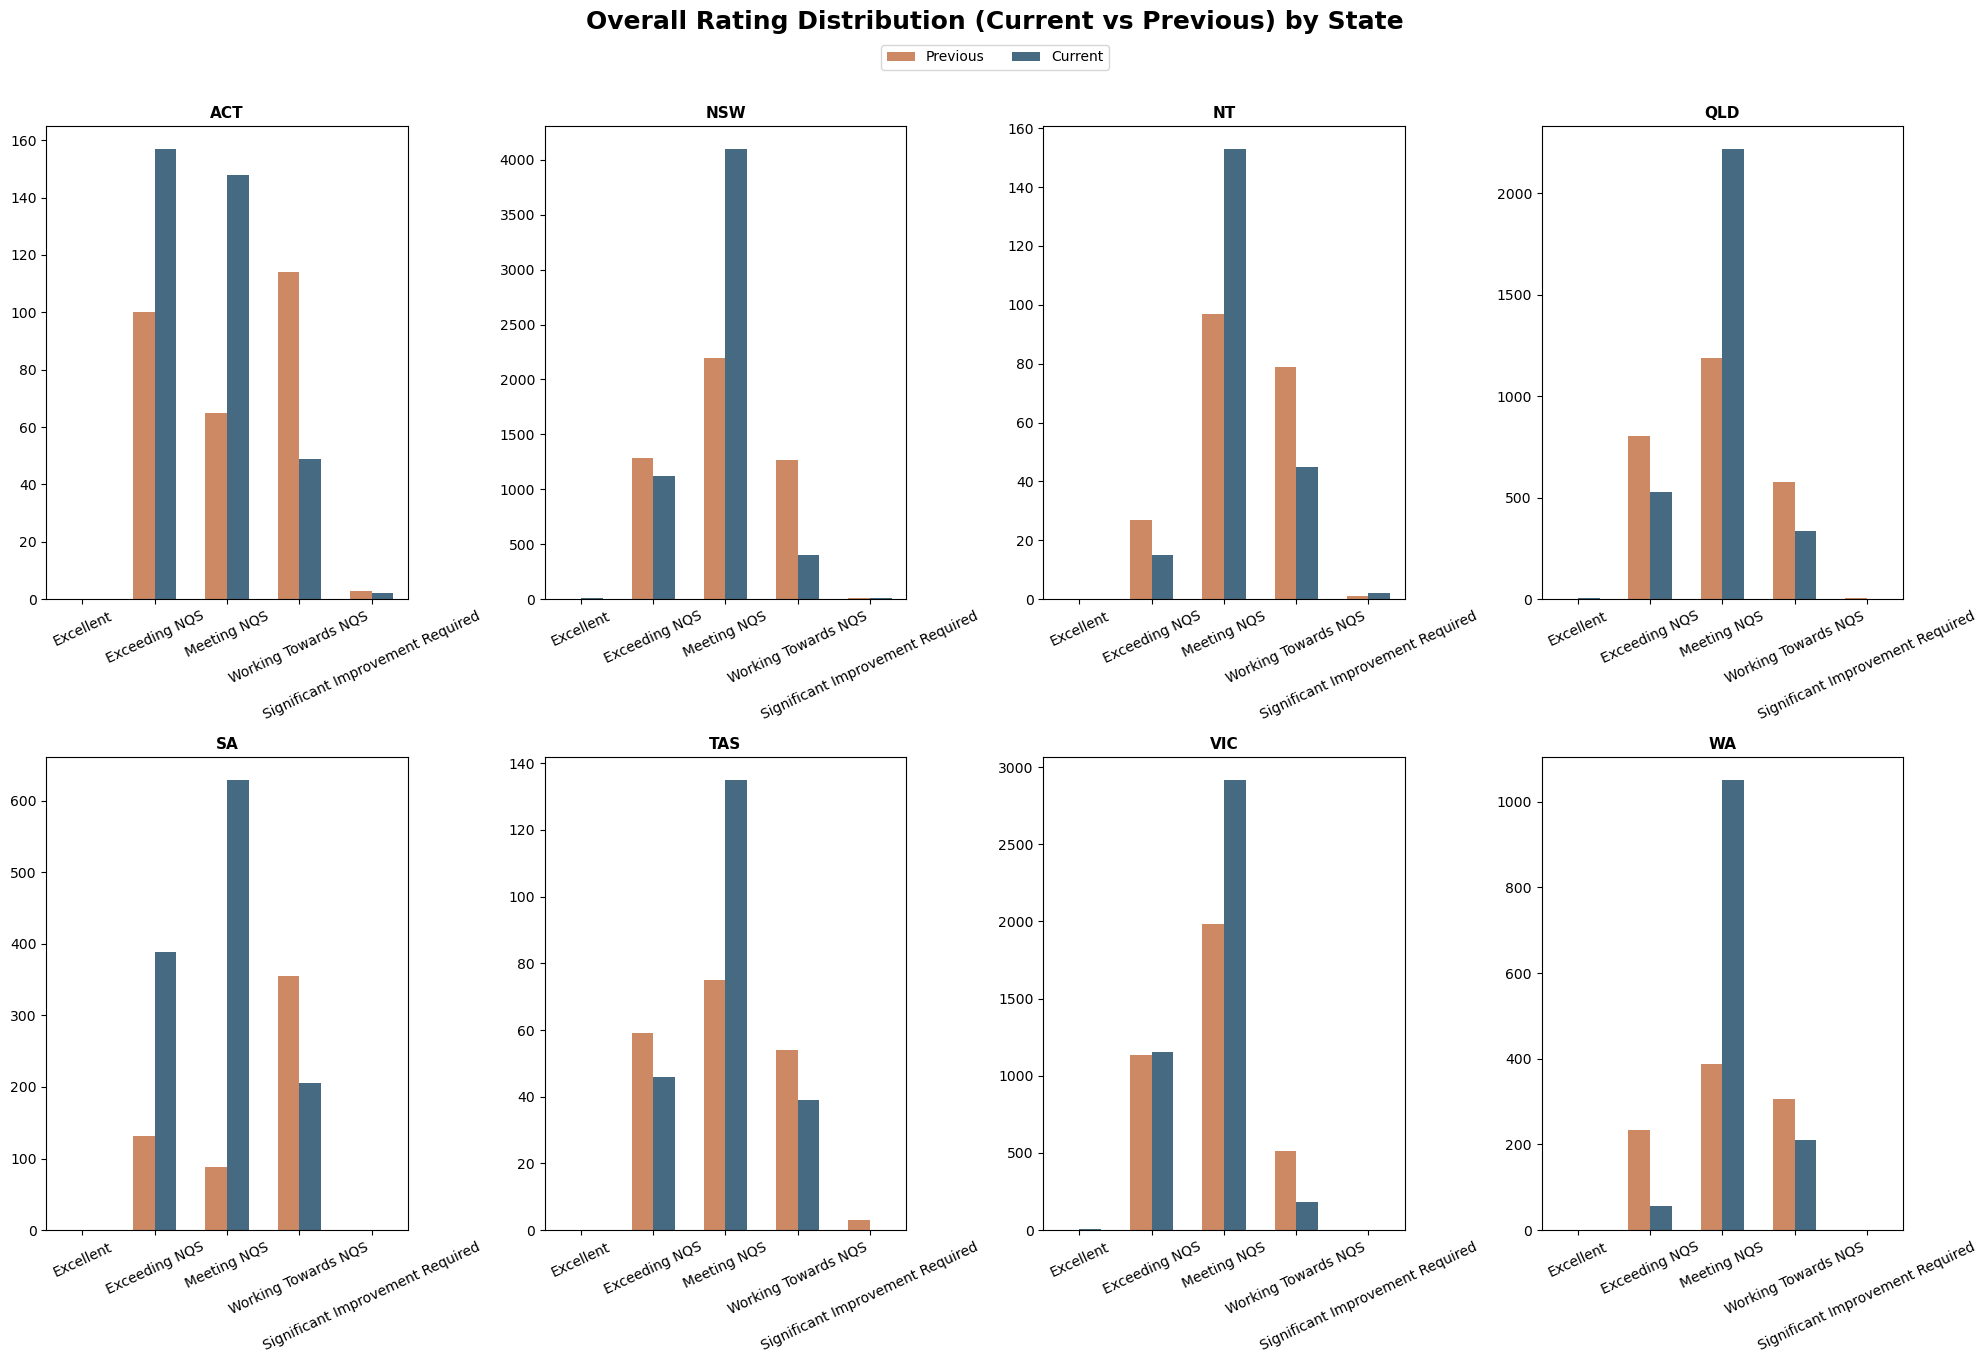

In [48]:
state_list = sorted(df['State'].dropna().astype(str).unique())[:24]

color_current = '#3C6C8B'   
color_previous = '#DD8452'  

rating_order = ['Excellent','Exceeding NQS','Meeting NQS','Working Towards NQS','Significant Improvement Required']

fig, axes = plt.subplots(2, 4, figsize=(20, 14))
axes = axes.flatten()

for i, state in enumerate(state_list):
    ax = axes[i]
    df_state = df[df['State'] == state]

    if df_state.empty:
        ax.axis('off')
        continue

    df_melted = df_state.melt(
        value_vars=['PreviousOverallRating', 'OverallRating'],
        var_name='Period',
        value_name='Rating'
    )

    sns.countplot(data=df_melted, x='Rating', hue='Period', order=rating_order, palette=[color_previous, color_current], width=0.6, ax=ax)

    ax.set_title(f"{state}", fontsize=11, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=25)
    ax.legend([], [], frameon=False)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Overall Rating Distribution (Current vs Previous) by State", fontsize=18, fontweight='bold', y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.94])

fig.legend(['Previous', 'Current'], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.show()


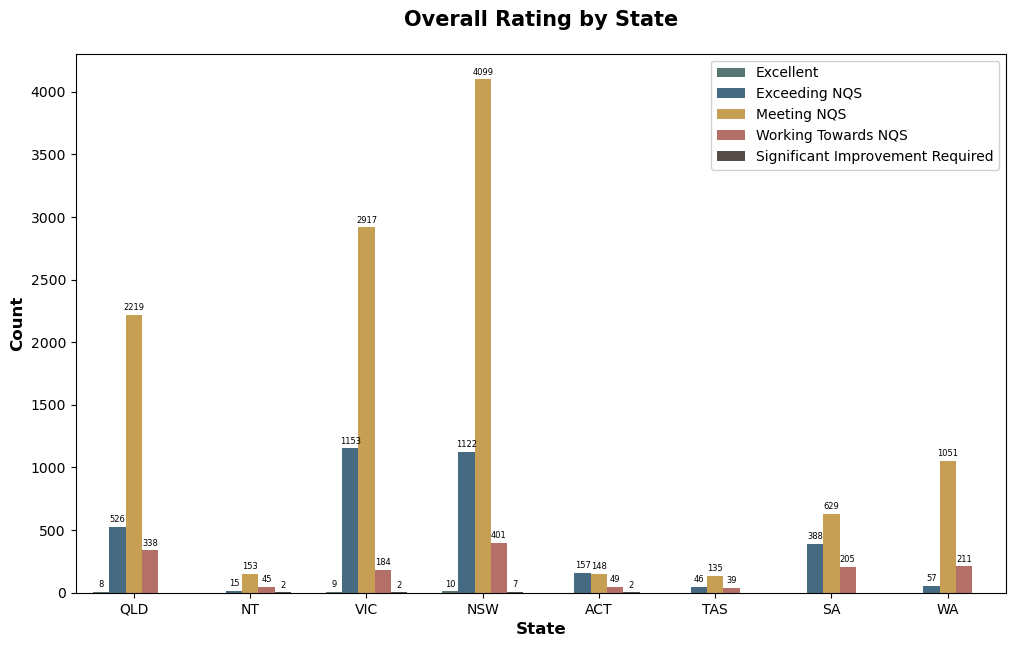

In [49]:
plt.figure(figsize=(12,7))

rating_colors = ['Excellent',
               'Exceeding NQS',
               'Meeting NQS',
               'Working Towards NQS',
               'Significant Improvement Required']


color_dict = {'Excellent':'#4F7C77',
                      'Exceeding NQS':'#3C6C8B',
                      'Meeting NQS':'#D9A441',
                      'Working Towards NQS':'#C1665A',
                      'Significant Improvement Required':'#5A4A49'}
color_dict_previous = {k: sns.desaturate(v, 0.4) for k, v in color_dict.items()}


state_order = (df['State'].value_counts().index)
    
ax = sns.countplot(data=df, x='State', hue='OverallRating', hue_order = rating_colors, palette=color_dict, width=0.7)

for i in ax.containers:
    ax.bar_label(i, fontsize=6, padding=2)

plt.xlabel('State', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Overall Rating by State', fontsize=15, fontweight='bold', pad=20)

plt.legend(loc='upper right', fontsize=10, framealpha=0.9) 


plt.show()
plt.savefig('Overall Rating by State.png', dpi=300, bbox_inches='tight')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


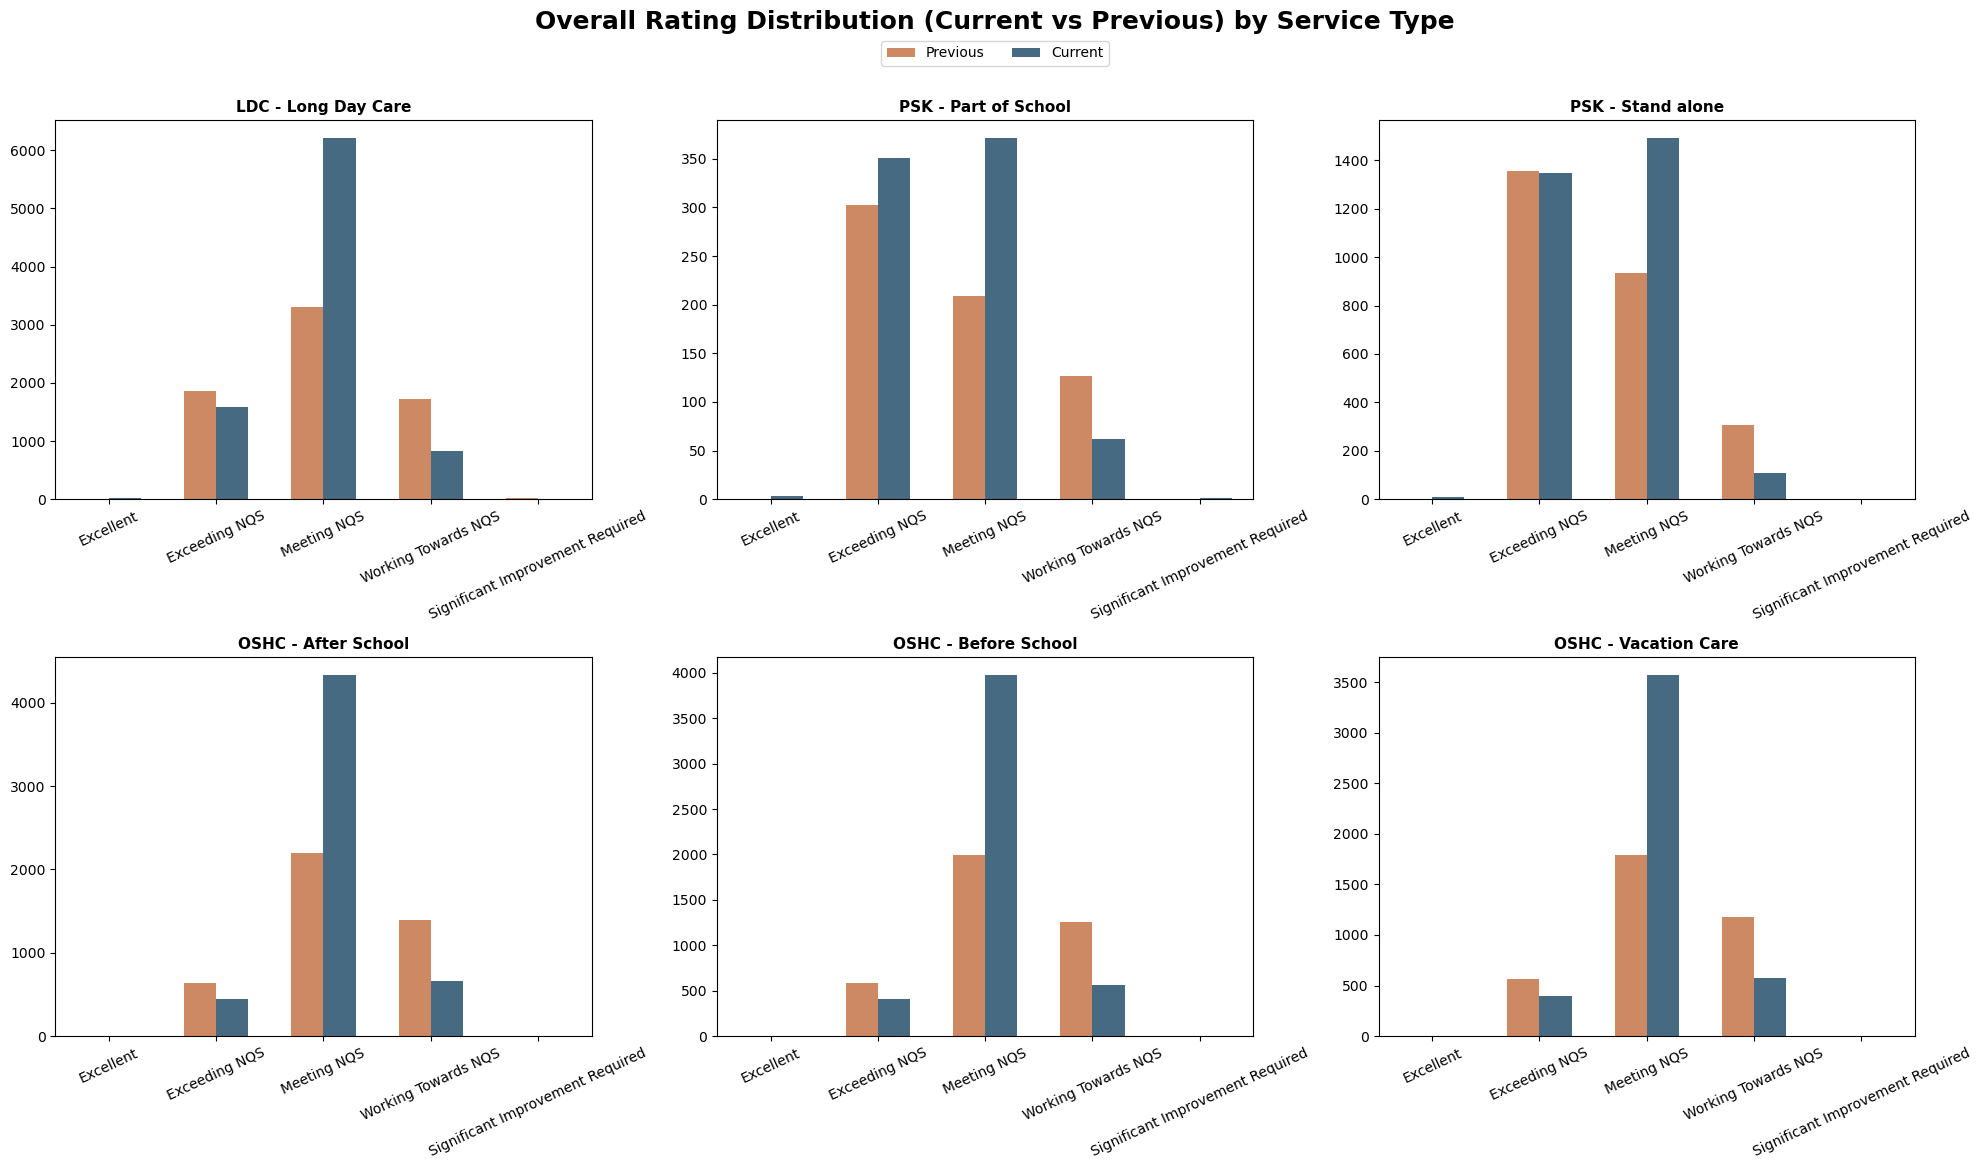

<Figure size 640x480 with 0 Axes>

In [60]:
color_current = '#3C6C8B'
color_previous = '#DD8452'
rating_order = ['Excellent','Exceeding NQS','Meeting NQS','Working Towards NQS','Significant Improvement Required']

service_type = [
    'Long Day Care',
    'Preschool/Kindergarten - Part of a School',
    'Preschool/Kindergarten - Stand alone',
    'Outside school Hours Care - After School',
    'Outside school Hours Care - Before School',
    'Outside school Hours Care - Vacation Care']

service_names_short = [
    'LDC - Long Day Care',
    'PSK - Part of School',
    'PSK - Stand alone',
    'OSHC - After School',
    'OSHC - Before School',
    'OSHC - Vacation Care']
name_map = dict(zip(service_type, service_names_short))

df_long = df.melt(
    id_vars=['OverallRating', 'PreviousOverallRating'],
    value_vars=service_type,
    var_name='ServiceType',
    value_name='HasService'
)
df_long = df_long[df_long['HasService'] == 'Yes']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, svc in enumerate(service_type):
    ax = axes[i]
    df_svc = df_long[df_long['ServiceType'] == svc]

    if df_svc.empty:
        ax.axis('off')
        continue

    df_melted = df_svc.melt(
        value_vars=['PreviousOverallRating', 'OverallRating'],
        var_name='Period',
        value_name='Rating')

    sns.countplot(data=df_melted, x='Rating', hue='Period', order=rating_order, palette=[color_previous, color_current], width=0.6, ax=ax)

    ax.set_title(name_map.get(svc, svc), fontsize=11, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=25)
    ax.legend([], [], frameon=False)


fig.suptitle('Overall Rating Distribution (Current vs Previous) by Service Type',
             fontsize=18, fontweight='bold', y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.94])

fig.legend(['Previous', 'Current'], loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.show()
plt.savefig('Overall Rating Distribution (Current vs Previous) by Service Type', dpi=300, bbox_inches='tight')

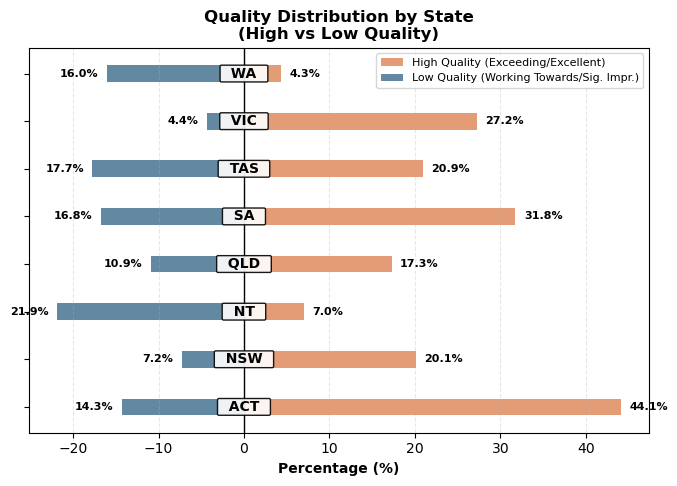

In [51]:
states = sorted(df['State'].dropna().unique())

fig, ax = plt.subplots(figsize=(8, 5))

high_quality_pct = []
low_quality_pct = []

for state in states:
    state_data = df[df['State'] == state]
    total = len(state_data[state_data['OverallRating'].notna()])
    
    if total > 0:
        high = len(state_data[state_data['OverallRating'].isin(['Exceeding NQS', 'Excellent'])])
        low = len(state_data[state_data['OverallRating'].isin(
            ['Working Towards NQS', 'Significant Improvement Required'])])
        
        high_quality_pct.append((high / total) * 100)
        low_quality_pct.append((low / total) * 100)
    else:
        high_quality_pct.append(0)
        low_quality_pct.append(0)

x = np.arange(len(states))
width = 0.35

bars1 = ax.barh(x, high_quality_pct, width, 
                 label='High Quality (Exceeding/Excellent)',
                 color='#DD8452', alpha=0.8)
bars2 = ax.barh(x, [-p for p in low_quality_pct], width,
                 label='Low Quality (Working Towards/Sig. Impr.)',
                 color='#3C6C8B', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels([])
for i, state in enumerate(states):
    ax.text(0, i, f'  {state}  ', ha='center', va='center', 
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.1', facecolor='white', 
                     edgecolor='black', linewidth=1, alpha=0.9))
    
ax.set_xlabel('Percentage (%)', fontweight='bold')
ax.set_title('Quality Distribution by State\n(High vs Low Quality)',
              fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linewidth=1)
ax.legend(loc='upper right', fontsize=8)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (h, l) in enumerate(zip(high_quality_pct, low_quality_pct)):
    ax.text(h + 1, i, f'{h:.1f}%', va='center', fontsize=8, fontweight='bold')
    ax.text(-l - 1, i, f'{l:.1f}%', va='center', ha='right', 
             fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('Quality Distribution by State\n(High vs Low Quality.png', dpi=300, bbox_inches='tight')
plt.show()

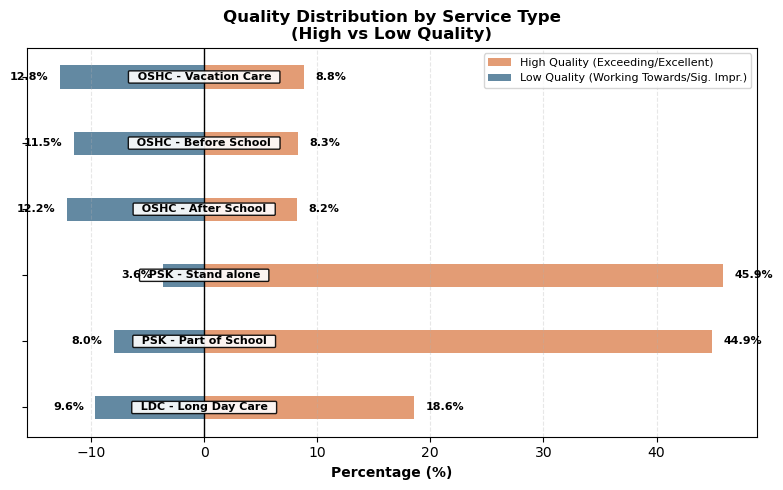

In [52]:
for col in service_type:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.upper()
        df[col] = df[col].replace({'YES': 'Yes', 'NO': 'No', 'TRUE': 'Yes', 'FALSE': 'No', '1': 'Yes', '0': 'No'})
        df[col] = df[col].fillna('No')

fig, ax = plt.subplots(figsize=(8, 5))
high_quality_pct = []
low_quality_pct = []

for service_col, service_name in zip(service_type, service_names_short):
    service_data = df[df[service_col] == 'Yes']
    total = len(service_data[service_data['OverallRating'].notna()])
    
    if total > 0:
        high = len(service_data[service_data['OverallRating'].isin(['Exceeding NQS', 'Excellent'])])
        low = len(service_data[service_data['OverallRating'].isin(
            ['Working Towards NQS', 'Significant Improvement Required'])])
        
        high_quality_pct.append((high / total) * 100)
        low_quality_pct.append((low / total) * 100)
    else:
        high_quality_pct.append(0)
        low_quality_pct.append(0)

x = np.arange(len(service_names_short))
width = 0.35

bars1 = ax.barh(x, high_quality_pct, width, 
                 label='High Quality (Exceeding/Excellent)',
                 color='#DD8452', alpha=0.8)
bars2 = ax.barh(x, [-p for p in low_quality_pct], width,
                 label='Low Quality (Working Towards/Sig. Impr.)',
                 color='#3C6C8B', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels([])

for i, service_name in enumerate(service_names_short):
    ax.text(0, i, f'  {service_name}  ', ha='center', va='center', 
            fontsize=8, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.1', facecolor='white', 
                     edgecolor='black', linewidth=1, alpha=0.9))
    
ax.set_xlabel('Percentage (%)', fontweight='bold')
ax.set_title('Quality Distribution by Service Type\n(High vs Low Quality)',
              fontweight='bold', fontsize=12)
ax.axvline(x=0, color='black', linewidth=1)
ax.legend(loc='upper right', fontsize=8)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for i, (h, l) in enumerate(zip(high_quality_pct, low_quality_pct)):
    ax.text(h + 1, i, f'{h:.1f}%', va='center', fontsize=8, fontweight='bold')
    ax.text(-l - 1, i, f'{l:.1f}%', va='center', ha='right', 
             fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('service_type_quality_exact_style.png', dpi=300, bbox_inches='tight')
plt.show()

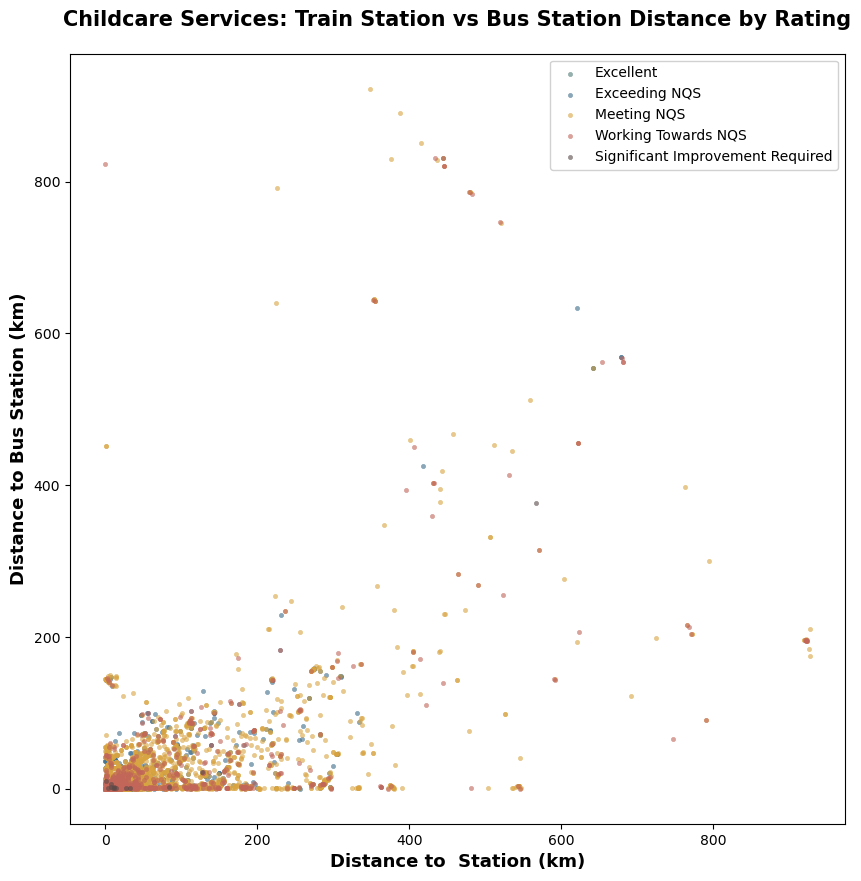

In [53]:
df_valid = df.dropna(subset=['DistanceToBusStation_km', 'DistanceToTrainStation_km', 'OverallRating'])
df_plot = df_valid[df_valid['OverallRating'].isin(color_dict.keys())].copy()

plt.figure(figsize=(10, 10))

for rating, color in color_dict.items():
    data = df_plot[df_plot['OverallRating'] == rating]
    plt.scatter(data['DistanceToBusStation_km'], data['DistanceToTrainStation_km'],c=color, label=rating, s=10, alpha=0.6, linewidth=0.3)

plt.xlabel('Distance to  Station (km)', fontsize=13, fontweight='bold')
plt.ylabel('Distance to Bus Station (km)', fontsize=13, fontweight='bold')
plt.title('Childcare Services: Train Station vs Bus Station Distance by Rating', 
          fontsize=15, fontweight='bold', pad=20)


plt.legend(loc='upper right', fontsize=10, framealpha=0.9)


In [54]:
df['DistanceToTrainStation_km'].describe()

count    17663.000000
mean        11.430682
std         44.637713
min          0.015182
25%          1.097043
50%          2.532500
75%          6.325120
max        922.403322
Name: DistanceToTrainStation_km, dtype: float64

In [55]:
df['DistanceToBusStation_km'].describe()

count    17663.000000
mean        32.089514
std         72.778463
min          0.024614
25%          4.778898
50%         10.195771
75%         23.200038
max        926.875371
Name: DistanceToBusStation_km, dtype: float64

In [56]:
df['MinTransportDistance'] = df[['DistanceToTrainStation_km',
                                 'DistanceToBusStation_km']].min(axis=1)

s = pd.to_numeric(df['MinTransportDistance'], errors='coerce')
s = s.dropna()
s = s[s.between(0, 200)] 

p95 = s.quantile(0.95)
p99 = s.quantile(0.99)
print(f"(95%: {p95:.2f} km, 99%: {p99:.2f} km)")


(95%: 31.94 km, 99%: 98.41 km)


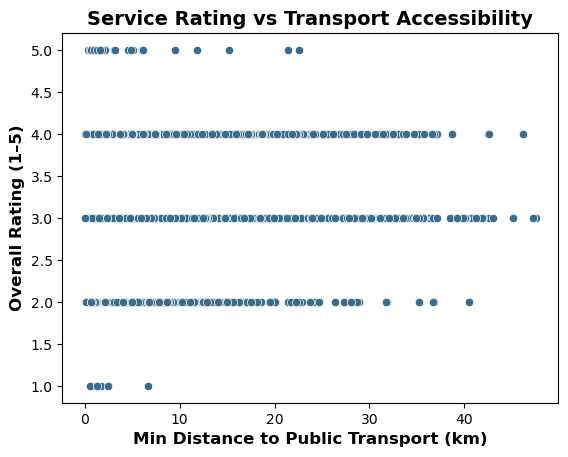

In [57]:
rating_mapping = {
    'Significant Improvement Required': 1,
    'Working Towards NQS': 2,
    'Meeting NQS': 3,
    'Exceeding NQS': 4,
    'Excellent': 5}

df['OverallRating1'] = df['OverallRating'].map(rating_mapping)

df_filtered = df[(df['DistanceToTrainStation_km'] <= 50) & 
    (df['DistanceToBusStation_km'] <= 50)].copy()

df_filtered['MinDistance'] = df_filtered[
    ['DistanceToTrainStation_km', 'DistanceToBusStation_km']].min(axis=1)

sns.scatterplot(x='MinDistance', y='OverallRating1', data=df_filtered, color='#3C6C8B')
plt.xlabel('Min Distance to Public Transport (km)', fontsize=12, fontweight='bold')
plt.ylabel('Overall Rating (1–5)', fontsize=12, fontweight='bold')
plt.title('Service Rating vs Transport Accessibility', fontsize=14, fontweight='bold')

plt.show()

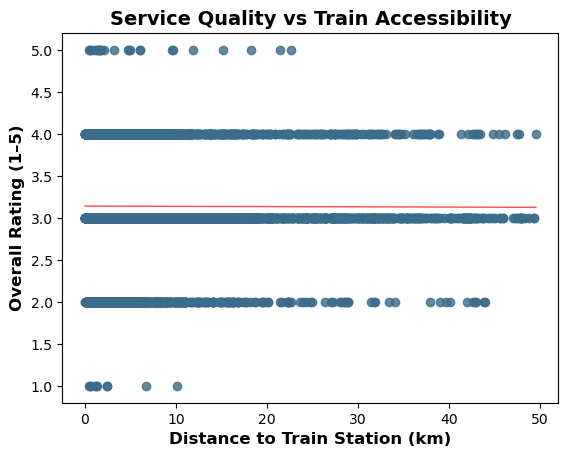

In [58]:
sns.regplot(x='DistanceToTrainStation_km', y='OverallRating1', data=df_filtered, ci = False, color='#3C6C8B', line_kws={"color":"r","alpha":0.7,"lw":1}) 

plt.xlabel("Distance to Train Station (km)", fontsize=12, fontweight='bold')
plt.ylabel("Overall Rating (1–5)", fontsize=12, fontweight='bold')
plt.title("Service Quality vs Train Accessibility", fontsize=14, fontweight='bold')
plt.show()


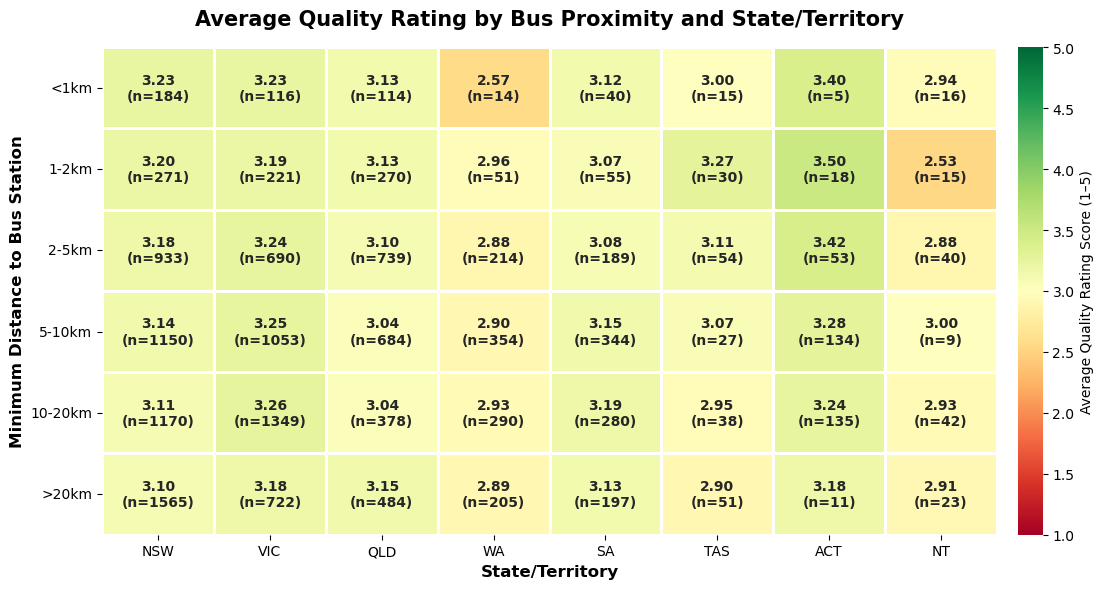

In [59]:
state_candidates = ['State', 'State/Territory', 'State or Territory', 'STATE', 'Jurisdiction']
state_col = next((c for c in state_candidates if c in df.columns), None)
if state_col is None:
    raise ValueError("找不到州字段，请确认数据里是否有 'State' 或类似列名。")

# 2) 公交最短距离分组（与火车分组保持一致，便于比较）
df['BusDistanceGroup'] = pd.cut(
    df['DistanceToBusStation_km'],
    bins=[0, 1, 2, 5, 10, 20, 100],
    labels=['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
)

# 3) 评级映射（若之前已做可跳过）
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
if 'RatingScore' not in df.columns:
    df['RatingScore'] = df['OverallRating'].map(rating_map)

# 4) 透视表：平均评级 & 样本量
pivot_bus_rating = df.pivot_table(
    values='RatingScore',
    index='BusDistanceGroup',
    columns=state_col,
    aggfunc='mean'
)

pivot_bus_count = df.pivot_table(
    values='RatingScore',
    index='BusDistanceGroup',
    columns=state_col,
    aggfunc='count'
)

# 5) 轴顺序：距离从近到远；州按常用顺序（如果缺失则自动跳过）
distance_order = ['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
state_order = ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT']
existing_states = [s for s in state_order if s in pivot_bus_rating.columns]

pivot_bus_rating = pivot_bus_rating.reindex(index=distance_order, columns=existing_states)
pivot_bus_count  = pivot_bus_count.reindex(index=distance_order, columns=existing_states)

# 6) 自定义注释：显示 平均分 + n
ann = []
for i in range(len(pivot_bus_rating.index)):
    row = []
    for j in range(len(pivot_bus_rating.columns)):
        r = pivot_bus_rating.iloc[i, j]
        n = pivot_bus_count.iloc[i, j]
        if pd.notna(r) and pd.notna(n):
            row.append(f"{r:.2f}\n(n={int(n)})")
        else:
            row.append("")
    ann.append(row)

# 7) 画图
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_bus_rating,
    annot=ann, fmt='',
    cmap='RdYlGn', vmin=1, vmax=5, center=3,
    linewidths=2, linecolor='white',
    cbar_kws={'label': 'Average Quality Rating Score (1–5)', 'pad': 0.02},
    annot_kws={'size': 10, 'weight': 'bold'}
)

plt.title('Average Quality Rating by Bus Proximity and State/Territory',
          fontsize=15, fontweight='bold', pad=16)
plt.xlabel('State/Territory', fontsize=12, fontweight='bold')
plt.ylabel('Minimum Distance to Bus Station', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [91]:
aus = gpd.read_file('/Users/shuuwaka/Desktop/qbus6860/SOS_2021_AUST_GDA94_SHP')
aus = aus.dropna()
aus.geometry = aus.geometry.simplify(0.001)
aus['SOS_CODE21'] = aus['SOS_CODE21'].astype(str)

postcode_df = pd.read_csv('postcode_to_sos.csv')
services_df = pd.read_csv('Education-services-with-station-access_loc.csv')

postcode_df['SOS_Code'] = postcode_df['SOS_Code'].astype(str)
services_df['Postcode_int'] = pd.to_numeric(services_df['Postcode'], errors='coerce').astype('Int64')
postcode_df['Postcode_int'] = pd.to_numeric(postcode_df['Postcode'], errors='coerce').astype('Int64')

result = services_df.merge(postcode_df[['Postcode_int', 'Urban_Rural', 'SOS_Code', 'SOS_Name']], 
                           on='Postcode_int', how='left')
result['DistanceToTrainStation_km'] = pd.to_numeric(result['DistanceToTrainStation_km'], errors='coerce')
result['DistanceToBusStation_km'] = pd.to_numeric(result['DistanceToBusStation_km'], errors='coerce')
result['MinDistance'] = result[['DistanceToTrainStation_km', 'DistanceToBusStation_km']].min(axis=1)

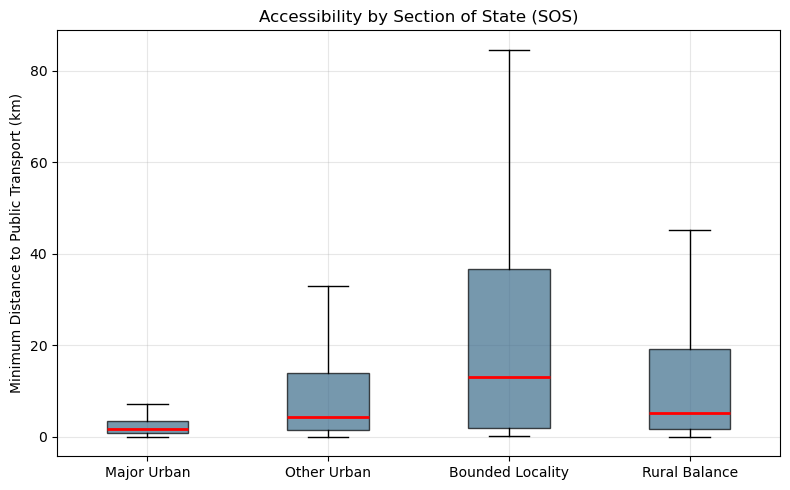

In [88]:
sos_order = ['Major Urban', 'Other Urban', 'Bounded Locality', 'Rural Balance']
# ensure the order actually exists in your data (in case some categories missing)
sos_order = [cat for cat in sos_order if cat in result['SOS_Name'].unique()]
df_plot = result[result['SOS_Name'].isin(sos_order)].copy()
plt.figure(figsize=(8,5))
data_to_plot = [df_plot.loc[df_plot['SOS_Name']==cat, 'MinDistance'].dropna() for cat in sos_order]
plt.boxplot(
    data_to_plot,
    labels=sos_order,
    showfliers=False,
    patch_artist=True,
    boxprops=dict(facecolor='#3C6C8B', alpha=0.7, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2)
)
plt.ylabel("Minimum Distance to Public Transport (km)")
plt.title("Accessibility by Section of State (SOS)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

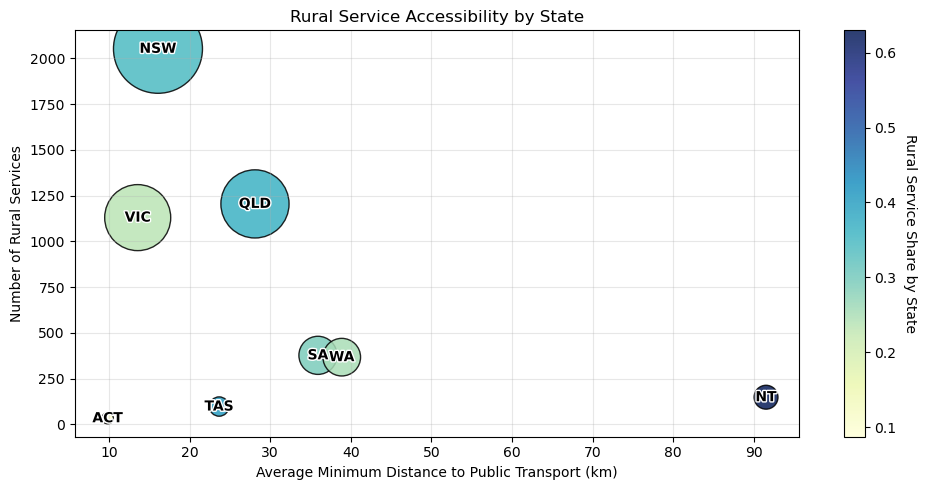

In [62]:
rural_classes = ['Rural', 'Rural Balance', 'Bounded Locality'] 
state_total = result.groupby('State', dropna=False)['MinDistance'].size().rename('TotalCount')
state_rural = result[result['Urban_Rural'].isin(rural_classes)].groupby('State')['MinDistance'].size().rename('RuralCount')

rural_share_df = pd.concat([state_total, state_rural], axis=1).fillna(0)
rural_share_df['rural_share'] = rural_share_df['RuralCount'] / rural_share_df['TotalCount']

rural_df = result[result['Urban_Rural'].isin(rural_classes)].copy()
bubble = (rural_df.groupby('State')['MinDistance']
          .agg(['mean','size'])
          .reset_index()
          .rename(columns={'mean':'AvgDistance_km','size':'ServiceCount'}))

bubble = bubble.merge(rural_share_df[['rural_share']], left_on='State', right_index=True, how='left')

plt.figure(figsize=(10,5))
sc = plt.scatter(
    bubble['AvgDistance_km'],
    bubble['ServiceCount'],
    s=bubble['ServiceCount'] * 2,
    c=bubble['rural_share'],
    cmap='YlGnBu',
    edgecolors='black',
    alpha=0.85)


for _, row in bubble.iterrows():
    txt = plt.text(
        row['AvgDistance_km'], row['ServiceCount'], row['State'],
        ha='center', va='center', color='black', weight='bold', fontsize=10)
    txt.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='white'),
        path_effects.Normal()])

cbar = plt.colorbar(sc)
cbar.set_label('Rural Service Share by State', rotation=270, labelpad=15)
plt.xlabel("Average Minimum Distance to Public Transport (km)")
plt.ylabel("Number of Rural Services")
plt.title("Rural Service Accessibility by State")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

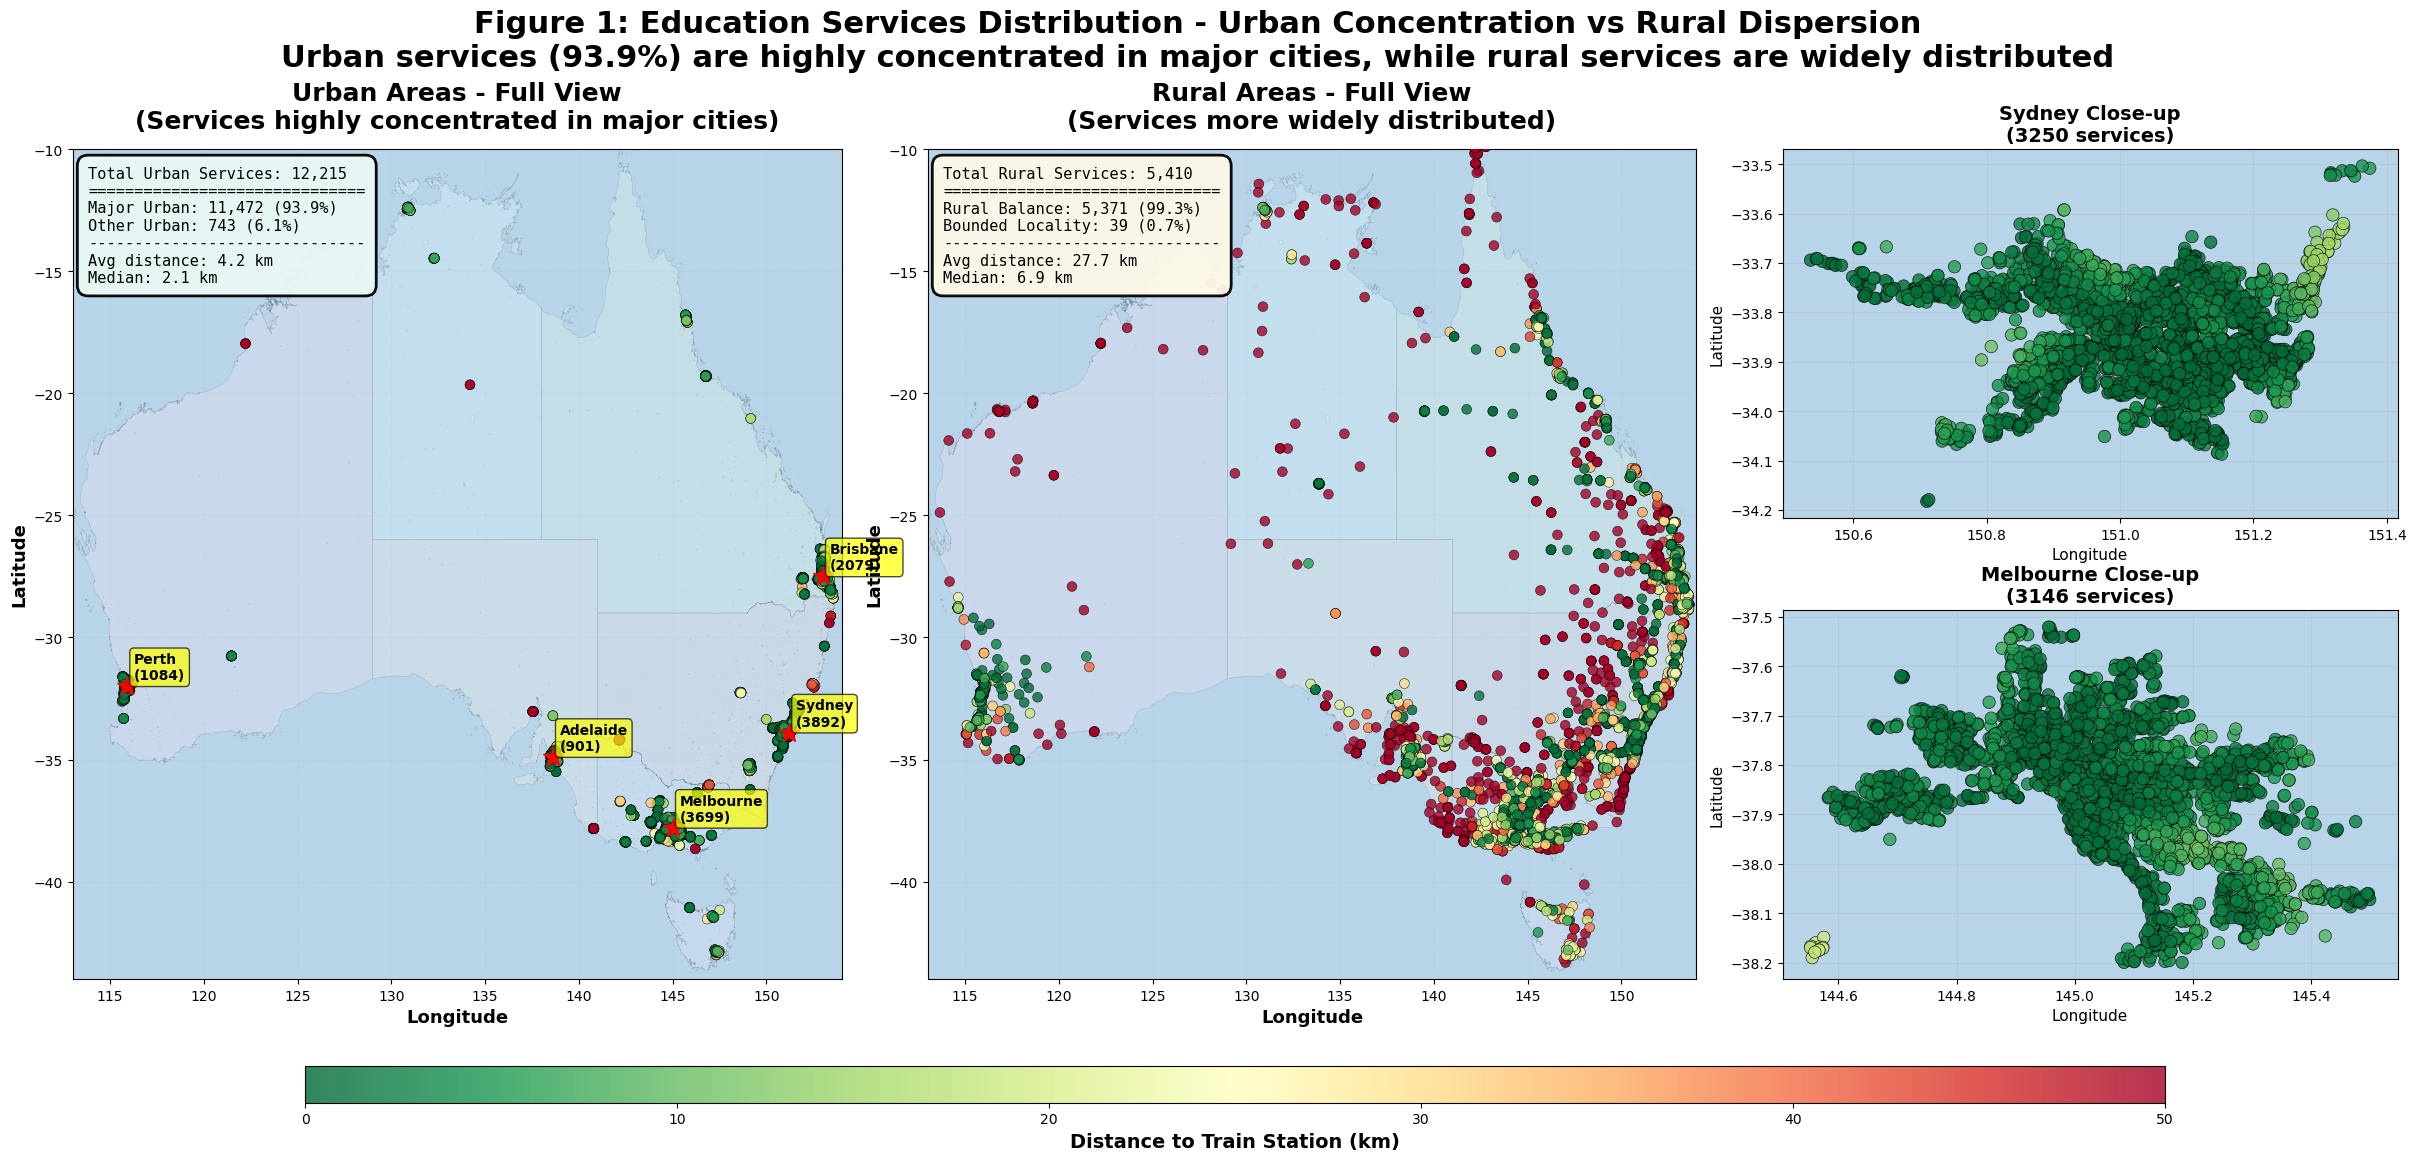

In [63]:
def extract_coords(geom_str):
    try:
        coords = str(geom_str).strip('c()').split(',')
        return float(coords[0]), float(coords[1])
    except:
        return None, None

result[['longitude', 'latitude']] = result['geometry'].apply(
    lambda x: pd.Series(extract_coords(x)) if pd.notna(x) else pd.Series([None, None])
)

df = result[(result['Urban_Rural'].isin(['Urban', 'Rural'])) & 
            (result['longitude'].notna()) & 
            (result['latitude'].notna())].copy()

# Create figure
fig = plt.figure(figsize=(30, 14))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 0.8], hspace=0.25, wspace=0.12)

# State colors
state_colors = {
    '1': '#FFE6E6', '2': '#E6F2FF', '3': '#E6FFE6', '4': '#FFF4E6',
    '5': '#FFE6F2', '6': '#F2E6FF', '7': '#E6FFFF', '8': '#FFFFF0',
}

# Left: Urban full view
ax1 = fig.add_subplot(gs[:, 0])
ax1.set_facecolor('#B8D4E8')

for _, sos_row in aus.iterrows():
    if sos_row.geometry is not None:
        sos_code = str(sos_row.get('SOS_CODE21', ''))
        state_prefix = sos_code[0] if len(sos_code) > 0 else '0'
        color = state_colors.get(state_prefix, '#f0f0f0')
        
        if isinstance(sos_row.geometry, Polygon):
            xs, ys = sos_row.geometry.exterior.xy
            ax1.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                    linewidth=0.3, alpha=0.25, zorder=1)
        elif isinstance(sos_row.geometry, MultiPolygon):
            for polygon in sos_row.geometry.geoms:
                xs, ys = polygon.exterior.xy
                ax1.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                        linewidth=0.3, alpha=0.25, zorder=1)

urban_df = df[df['Urban_Rural'] == 'Urban']
scatter1 = ax1.scatter(urban_df['longitude'], urban_df['latitude'],
                      c=urban_df['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=50, alpha=0.8,
                      edgecolors='black', linewidth=0.4,
                      vmin=0, vmax=50, zorder=3)

ax1.set_title('Urban Areas - Full View\n(Services highly concentrated in major cities)', 
             fontsize=18, fontweight='bold', pad=15)
ax1.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax1.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax1.set_xlim(113, 154)
ax1.set_ylim(-44, -10)
ax1.grid(True, alpha=0.2, linestyle=':')

cities = {
    'Sydney': (151.2, -33.9, 3892),
    'Melbourne': (145.0, -37.8, 3699),
    'Brisbane': (153.0, -27.5, 2079),
    'Perth': (115.9, -32.0, 1084),
    'Adelaide': (138.6, -34.9, 901)
}

for city, (lon, lat, count) in cities.items():
    ax1.plot(lon, lat, 'r*', markersize=15, zorder=4)
    ax1.annotate(f'{city}\n({count})', xy=(lon, lat), xytext=(5, 5),
                textcoords='offset points', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                zorder=5)

stats1 = f'Total Urban Services: {len(urban_df):,}\n'
stats1 += f'{"="*30}\n'
stats1 += f'Major Urban: {(urban_df["SOS_Name"]=="Major Urban").sum():,} (93.9%)\n'
stats1 += f'Other Urban: {(urban_df["SOS_Name"]=="Other Urban").sum():,} (6.1%)\n'
stats1 += f'{"-"*30}\n'
stats1 += f'Avg distance: {urban_df["DistanceToTrainStation_km"].mean():.1f} km\n'
stats1 += f'Median: {urban_df["DistanceToTrainStation_km"].median():.1f} km'

ax1.text(0.02, 0.98, stats1, transform=ax1.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='#E8F8F5',
                 alpha=0.95, edgecolor='black', linewidth=2))

# Middle: Rural full view
ax2 = fig.add_subplot(gs[:, 1])
ax2.set_facecolor('#B8D4E8')

for _, sos_row in aus.iterrows():
    if sos_row.geometry is not None:
        sos_code = str(sos_row.get('SOS_CODE21', ''))
        state_prefix = sos_code[0] if len(sos_code) > 0 else '0'
        color = state_colors.get(state_prefix, '#f0f0f0')
        
        if isinstance(sos_row.geometry, Polygon):
            xs, ys = sos_row.geometry.exterior.xy
            ax2.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                    linewidth=0.3, alpha=0.25, zorder=1)
        elif isinstance(sos_row.geometry, MultiPolygon):
            for polygon in sos_row.geometry.geoms:
                xs, ys = polygon.exterior.xy
                ax2.fill(xs, ys, facecolor=color, edgecolor='#34495E',
                        linewidth=0.3, alpha=0.25, zorder=1)

rural_df = df[df['Urban_Rural'] == 'Rural']
scatter2 = ax2.scatter(rural_df['longitude'], rural_df['latitude'],
                      c=rural_df['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=50, alpha=0.8,
                      edgecolors='black', linewidth=0.4,
                      vmin=0, vmax=50, zorder=3)

ax2.set_title('Rural Areas - Full View\n(Services more widely distributed)', 
             fontsize=18, fontweight='bold', pad=15)
ax2.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax2.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax2.set_xlim(113, 154)
ax2.set_ylim(-44, -10)
ax2.grid(True, alpha=0.2, linestyle=':')

stats2 = f'Total Rural Services: {len(rural_df):,}\n'
stats2 += f'{"="*30}\n'
stats2 += f'Rural Balance: {(rural_df["SOS_Name"]=="Rural Balance").sum():,} (99.3%)\n'
stats2 += f'Bounded Locality: {(rural_df["SOS_Name"]=="Bounded Locality").sum():,} (0.7%)\n'
stats2 += f'{"-"*30}\n'
stats2 += f'Avg distance: {rural_df["DistanceToTrainStation_km"].mean():.1f} km\n'
stats2 += f'Median: {rural_df["DistanceToTrainStation_km"].median():.1f} km'

ax2.text(0.02, 0.98, stats2, transform=ax2.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='#FEF9E7',
                 alpha=0.95, edgecolor='black', linewidth=2))

# Right top: Sydney close-up
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_facecolor('#B8D4E8')

sydney_urban = urban_df[(urban_df['longitude'] > 150.5) & 
                        (urban_df['longitude'] < 151.5) &
                        (urban_df['latitude'] > -34.2) & 
                        (urban_df['latitude'] < -33.5)]

scatter3 = ax3.scatter(sydney_urban['longitude'], sydney_urban['latitude'],
                      c=sydney_urban['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=80, alpha=0.8,
                      edgecolors='black', linewidth=0.5,
                      vmin=0, vmax=50, zorder=3)

ax3.set_title(f'Sydney Close-up\n({len(sydney_urban)} services)', 
             fontsize=14, fontweight='bold')
ax3.set_xlabel('Longitude', fontsize=11)
ax3.set_ylabel('Latitude', fontsize=11)
ax3.grid(True, alpha=0.3)

# Right bottom: Melbourne close-up
ax4 = fig.add_subplot(gs[1, 2])
ax4.set_facecolor('#B8D4E8')

melbourne_urban = urban_df[(urban_df['longitude'] > 144.5) & 
                           (urban_df['longitude'] < 145.5) &
                           (urban_df['latitude'] > -38.2) & 
                           (urban_df['latitude'] < -37.5)]

scatter4 = ax4.scatter(melbourne_urban['longitude'], melbourne_urban['latitude'],
                      c=melbourne_urban['DistanceToTrainStation_km'],
                      cmap='RdYlGn_r', s=80, alpha=0.8,
                      edgecolors='black', linewidth=0.5,
                      vmin=0, vmax=50, zorder=3)

ax4.set_title(f'Melbourne Close-up\n({len(melbourne_urban)} services)', 
             fontsize=14, fontweight='bold')
ax4.set_xlabel('Longitude', fontsize=11)
ax4.set_ylabel('Latitude', fontsize=11)
ax4.grid(True, alpha=0.3)

# Title and colorbar
fig.suptitle('Figure 1: Education Services Distribution - Urban Concentration vs Rural Dispersion\n' +
            'Urban services (93.9%) are highly concentrated in major cities, while rural services are widely distributed',
            fontsize=22, fontweight='bold', y=0.98)

cbar = fig.colorbar(scatter2, ax=[ax1, ax2, ax3, ax4], 
                   location='bottom', pad=0.08, aspect=50, shrink=0.8)
cbar.set_label('Distance to Train Station (km)', fontsize=14, fontweight='bold')

plt.savefig('figure1_urban_rural_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [64]:

df['Annual Monday Start Time'] = pd.to_datetime(df['Annual Monday Start Time'], format='%H:%M:%S', errors='coerce')
df['Annual Monday End Time'] = pd.to_datetime(df['Annual Monday End Time'], format='%H:%M:%S', errors='coerce')

df['OpeningHoursAnnualMonday'] = (df['Annual Monday End Time'] - df['Annual Monday Start Time']).dt.total_seconds() / 3600
df['OpeningHoursAnnualMonday'].head() 

0    12.0
1    12.0
2    12.0
3    12.0
4    11.5
Name: OpeningHoursAnnualMonday, dtype: float64

In [65]:
df['OpeningHoursAnnualMonday'].value_counts()

OpeningHoursAnnualMonday
 12.000000    2937
 11.000000    2528
 11.500000    1379
 10.500000    1080
 10.000000     705
 8.000000      350
 7.500000      246
 9.500000      156
 9.000000      149
 6.000000      143
 8.500000       83
 11.250000      83
 23.983333      79
 10.250000      67
 6.500000       60
 3.000000       57
 7.000000       53
 10.750000      49
 12.500000      47
 11.750000      30
 2.000000       26
 5.000000       25
 9.750000       20
 6.250000       20
 0.083333       19
 13.000000      16
 3.500000       14
 7.750000       14
 9.250000       14
 3.250000       11
 0.000000       11
 2.500000       10
 8.750000       10
 8.250000        8
 3.166667        7
 6.750000        6
 1.500000        6
 13.500000       6
 2.750000        5
 6.166667        4
 2.666667        4
 5.500000        4
-1.000000        4
 14.000000       3
 2.250000        3
 5.750000        3
 4.000000        3
 4.250000        2
 11.666667       2
 3.333333        2
 2.833333        2
 17.50

In [66]:
df[df['OpeningHoursAnnualMonday']<0]
df.loc[df['OpeningHoursAnnualMonday'] < 0, 'OpeningHoursAnnualMonday'] += 12
df['OpeningHoursAnnualMonday'].value_counts()

OpeningHoursAnnualMonday
12.000000    2937
11.000000    2532
11.500000    1380
10.500000    1081
10.000000     707
8.000000      351
7.500000      246
9.500000      156
9.000000      149
6.000000      143
11.250000      83
8.500000       83
23.983333      79
10.250000      67
6.500000       60
3.000000       57
7.000000       53
10.750000      49
12.500000      47
11.750000      30
2.000000       26
5.000000       25
6.250000       20
9.750000       20
0.083333       19
13.000000      16
7.750000       14
3.500000       14
9.250000       14
3.250000       11
0.000000       11
2.500000       10
8.750000       10
8.250000        8
3.166667        7
13.500000       6
1.500000        6
6.750000        6
2.750000        5
5.500000        5
6.166667        4
2.666667        4
2.250000        3
4.000000        3
5.750000        3
14.000000       3
11.666667       2
3.333333        2
2.833333        2
17.500000       2
1.000000        2
1.250000        2
12.250000       2
1.750000        2
10.

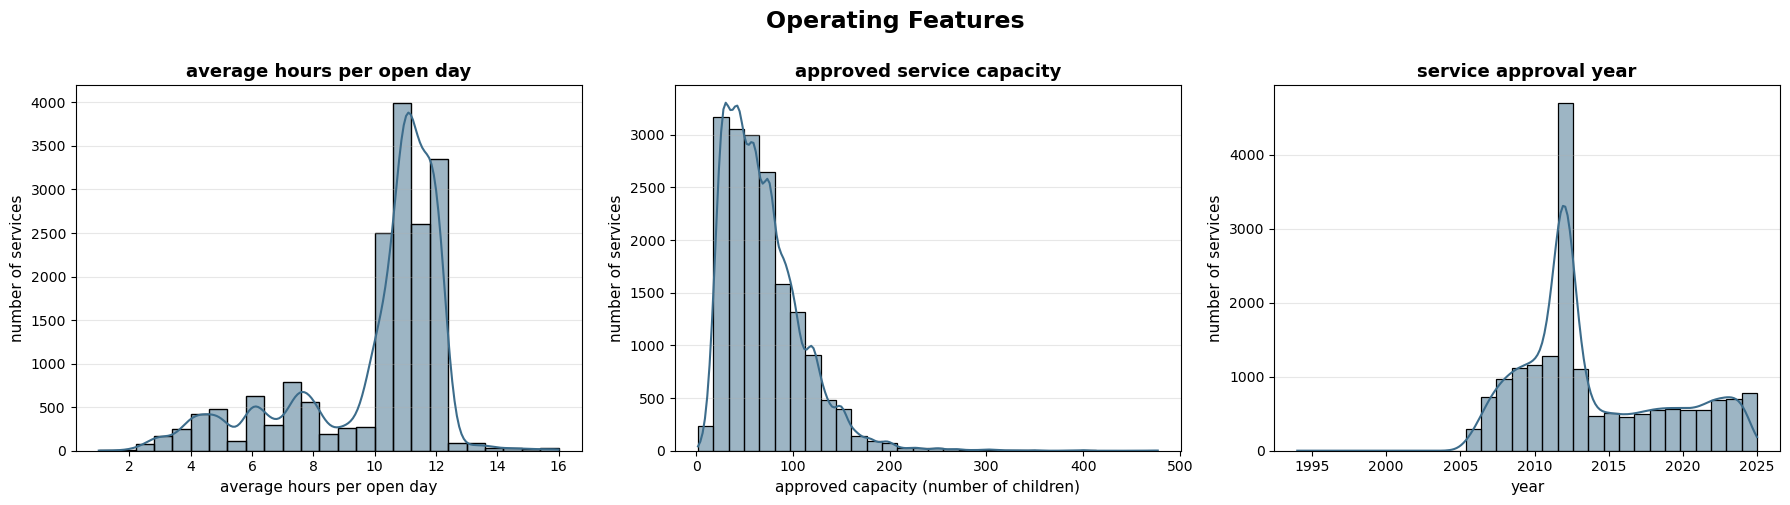

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# calculation
def hours_between(start, end):
    if pd.isna(start) or pd.isna(end):
        return np.nan
    s = pd.to_datetime(start, errors='coerce')
    e = pd.to_datetime(end,   errors='coerce')
    if pd.isna(s) or pd.isna(e):
        return np.nan
    hrs = (e - s).total_seconds() / 3600.0
    if hrs < 0:
        hrs += 12   # 跨夜补 12 小时
    if hrs < 0 or hrs > 24:
        return np.nan
    return hrs

# na
def safe_get(row, colname):
    return row[colname] if colname in row and pd.notna(row[colname]) else np.nan

# calculate the length of annual, SchoolTerm (session1+session2), and holiday
# takes the maximum value
for d in days:
    a_start = f'Annual {d} Start Time'
    a_end   = f'Annual {d} End Time'

    s1_start = f'School Terms Only Session 1 {d} Start Time'
    s1_end   = f'School Terms Only Session 1 {d} End Time'
    s1_start_alt = f'School Terms Only Session1 {d} Start Time'
    s1_end_alt   = f'School Terms Only Session1 {d} End Time'

    s2_start = f'School Terms Only Session 2 {d} Start Time'
    s2_end   = f'School Terms Only Session 2 {d} End Time'
    s2_start_alt = f'School Terms Only Session2 {d} Start Time'
    s2_end_alt   = f'School Terms Only Session2 {d} End Time'

    h_start = f'Holiday Care {d} Start Time'
    h_end   = f'Holiday Care {d} End Time'

    def per_row_day_hours(row):

        a_hrs = hours_between(safe_get(row, a_start), safe_get(row, a_end))

 
        s1_s = safe_get(row, s1_start)
        s1_e = safe_get(row, s1_end)
        if pd.isna(s1_s) and pd.isna(s1_e):
            s1_s = safe_get(row, s1_start_alt)
            s1_e = safe_get(row, s1_end_alt)
        s1_hrs = hours_between(s1_s, s1_e)


        s2_s = safe_get(row, s2_start)
        s2_e = safe_get(row, s2_end)
        if pd.isna(s2_s) and pd.isna(s2_e):
            s2_s = safe_get(row, s2_start_alt)
            s2_e = safe_get(row, s2_end_alt)
        s2_hrs = hours_between(s2_s, s2_e)


        st_hrs = np.nansum([s1_hrs, s2_hrs]) if (pd.notna(s1_hrs) or pd.notna(s2_hrs)) else np.nan

 
        h_hrs = hours_between(safe_get(row, h_start), safe_get(row, h_end))

        candidates = [a_hrs, st_hrs, h_hrs]
        if all(pd.isna(x) for x in candidates):
            return np.nan
        return np.nanmax(candidates)


    df[f'AnnualHours_{d}'] = df.apply(per_row_day_hours, axis=1)


daily_cols = [f'AnnualHours_{d}' for d in days]

df['AllDaysNA'] = df[daily_cols].isna().all(axis=1)


df['OpenDays'] = df[daily_cols].gt(0).sum(axis=1)
df.loc[df['AllDaysNA'], 'OpenDays'] = np.nan

# average on open day
df['DailyAvgHours_open'] = np.where(
    df['OpenDays'] > 0,
    df[daily_cols].sum(axis=1, skipna=True) / df['OpenDays'],
    np.nan
)

plot_series = df.loc[
    df['DailyAvgHours_open'].between(1, 16, inclusive='both'),
    'DailyAvgHours_open'
].dropna()

# left: operating hours
sns.histplot(plot_series, bins=25, kde=True, color='#3C6C8B', ax=ax1)
ax1.set_title("average hours per open day", fontsize=13, fontweight='bold')
ax1.set_xlabel("average hours per open day", fontsize=11)
ax1.set_ylabel("number of services", fontsize=11)
ax1.grid(alpha=0.3, axis='y')

# middle: capacity
sns.histplot(df['NumberOfApprovedPlaces'].dropna(), bins=30, kde=True, 
             color='#3C6C8B', ax=ax2)
ax2.set_title('approved service capacity', fontsize=13, fontweight='bold')
ax2.set_xlabel('approved capacity (number of children)', fontsize=11)
ax2.set_ylabel('number of services', fontsize=11)
ax2.grid(alpha=0.3, axis='y')

# right: approval year
df['ServiceApprovalGrantedDate'] = pd.to_datetime(df['ServiceApprovalGrantedDate'], 
                                                   format='%d/%m/%Y', errors='coerce')
df['ApprovalYear'] = df['ServiceApprovalGrantedDate'].dt.year

sns.histplot(df['ApprovalYear'].dropna(), bins=30, kde=True, 
             color='#3C6C8B', ax=ax3)
ax3.set_title('service approval year', fontsize=13, fontweight='bold')
ax3.set_xlabel('year', fontsize=11)
ax3.set_ylabel('number of services', fontsize=11)
ax3.grid(alpha=0.3, axis='y')

fig.suptitle('Operating Features',
            fontsize=17, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

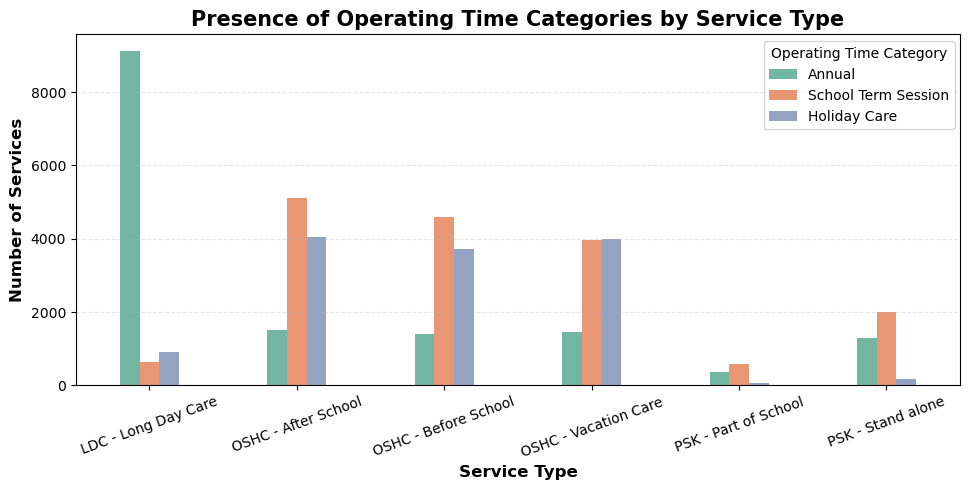

In [54]:
annual_cols = [col for col in df.columns if col.startswith('Annual ')]
session_cols = [col for col in df.columns if col.startswith('School Terms Only Session')]
holiday_cols = [col for col in df.columns if col.startswith('Holiday Care')]

df['Has_Annual']  = df[annual_cols].notna().any(axis=1)
df['Has_Session'] = df[session_cols].notna().any(axis=1)
df['Has_Holiday'] = df[holiday_cols].notna().any(axis=1)

service_type_cols = [
    'Long Day Care',
    'Preschool/Kindergarten - Part of a School',
    'Preschool/Kindergarten - Stand alone',
    'Outside school Hours Care - After School',
    'Outside school Hours Care - Before School',
    'Outside school Hours Care - Vacation Care'
]

service_names_short = [
    'LDC - Long Day Care',
    'PSK - Part of School',
    'PSK - Stand alone',
    'OSHC - After School',
    'OSHC - Before School',
    'OSHC - Vacation Care'
]
name_map = dict(zip(service_type_cols, service_names_short))

df_long = df.melt(
    id_vars=['Has_Annual','Has_Session','Has_Holiday'],
    value_vars=service_type_cols,
    var_name='ServiceType',
    value_name='HasService'
)
df_long = df_long[df_long['HasService'].str.lower() == 'yes']
df_long['ServiceType'] = df_long['ServiceType'].map(name_map)

summary = df_long.groupby('ServiceType')[['Has_Annual','Has_Session','Has_Holiday']].sum().reset_index()

summary_melted = summary.melt(
    id_vars='ServiceType',
    var_name='TimeCategory',
    value_name='Count'
)

time_map = {
    'Has_Annual': 'Annual',
    'Has_Session': 'School Term Session',
    'Has_Holiday': 'Holiday Care'
}
summary_melted['TimeCategory'] = summary_melted['TimeCategory'].map(time_map)

plt.figure(figsize=(10,5))
sns.barplot(data=summary_melted, x='ServiceType', y='Count',
            hue='TimeCategory', palette='Set2', width=0.4)

plt.title('Presence of Operating Time Categories by Service Type', fontsize=15, fontweight='bold')
plt.xlabel('Service Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Services', fontsize=12, fontweight='bold')
plt.xticks(rotation=20)
plt.legend(title='Operating Time Category', bbox_to_anchor=(0.77,1), loc='upper left')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


绘图数据: 9087 个服务


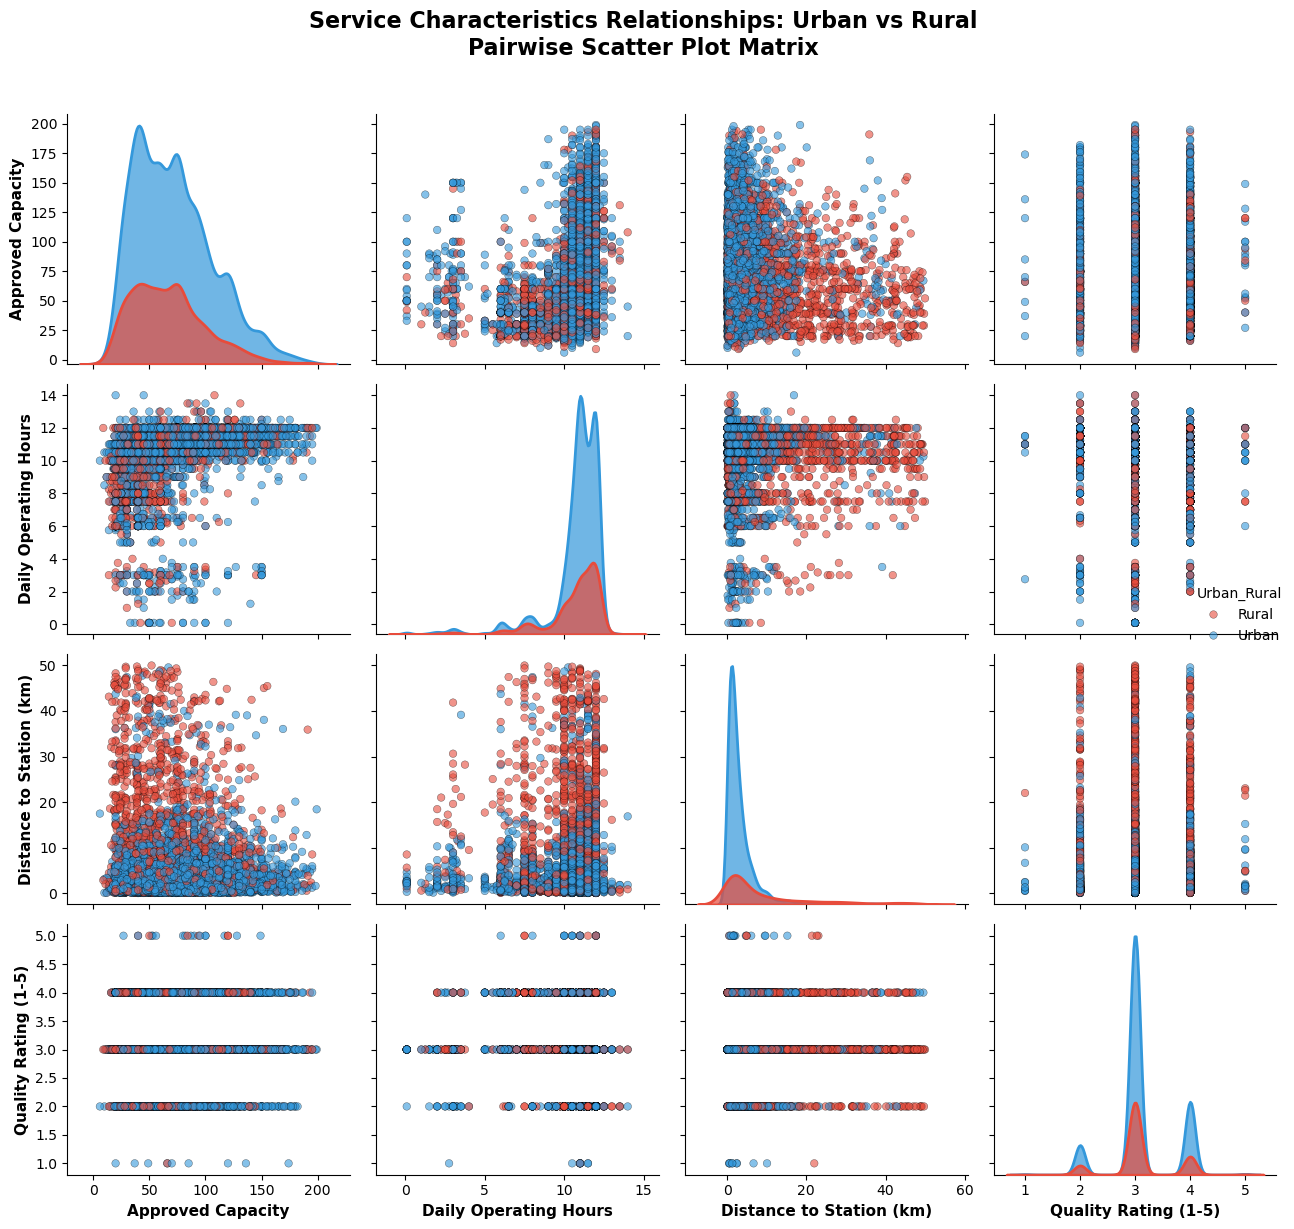

In [70]:
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

df['ApprovalYear'] = pd.to_datetime(df['ServiceApprovalGrantedDate'], 
                                     format='%d/%m/%Y', errors='coerce').dt.year

plot_vars = [
    'NumberOfApprovedPlaces',
    'DailyAvgHours_open', 
    'DistanceToTrainStation_km',
    'RatingScore'
]

#filtered
plot_data = df[plot_vars + ['Urban_Rural']].dropna()

plot_data = plot_data[
    (plot_data['NumberOfApprovedPlaces'] < 200) &
    (plot_data['DailyAvgHours_open'] < 15) &
    (plot_data['DistanceToTrainStation_km'] < 50)
]


g = sns.pairplot(
    plot_data, 
    hue='Urban_Rural',
    palette={'Urban': '#3498db', 'Rural': '#e74c3c'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'black', 'linewidth': 0.3},
    diag_kws={'alpha': 0.7, 'linewidth': 2},
    height=3,
    aspect=1
)

labels = [
    'Approved Capacity',
    'Daily Operating Hours',
    'Distance to Station (km)',
    'Quality Rating (1-5)'
]

for i in range(len(plot_vars)):
    for j in range(len(plot_vars)):
        ax = g.axes[i, j]
        if i == len(plot_vars) - 1:
            ax.set_xlabel(labels[j], fontsize=11, fontweight='bold')
        if j == 0:
            ax.set_ylabel(labels[i], fontsize=11, fontweight='bold')

g.fig.suptitle('Service Characteristics Relationships: Urban vs Rural\nPairwise Scatter Plot Matrix', 
              fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('pairplot_urban_rural.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

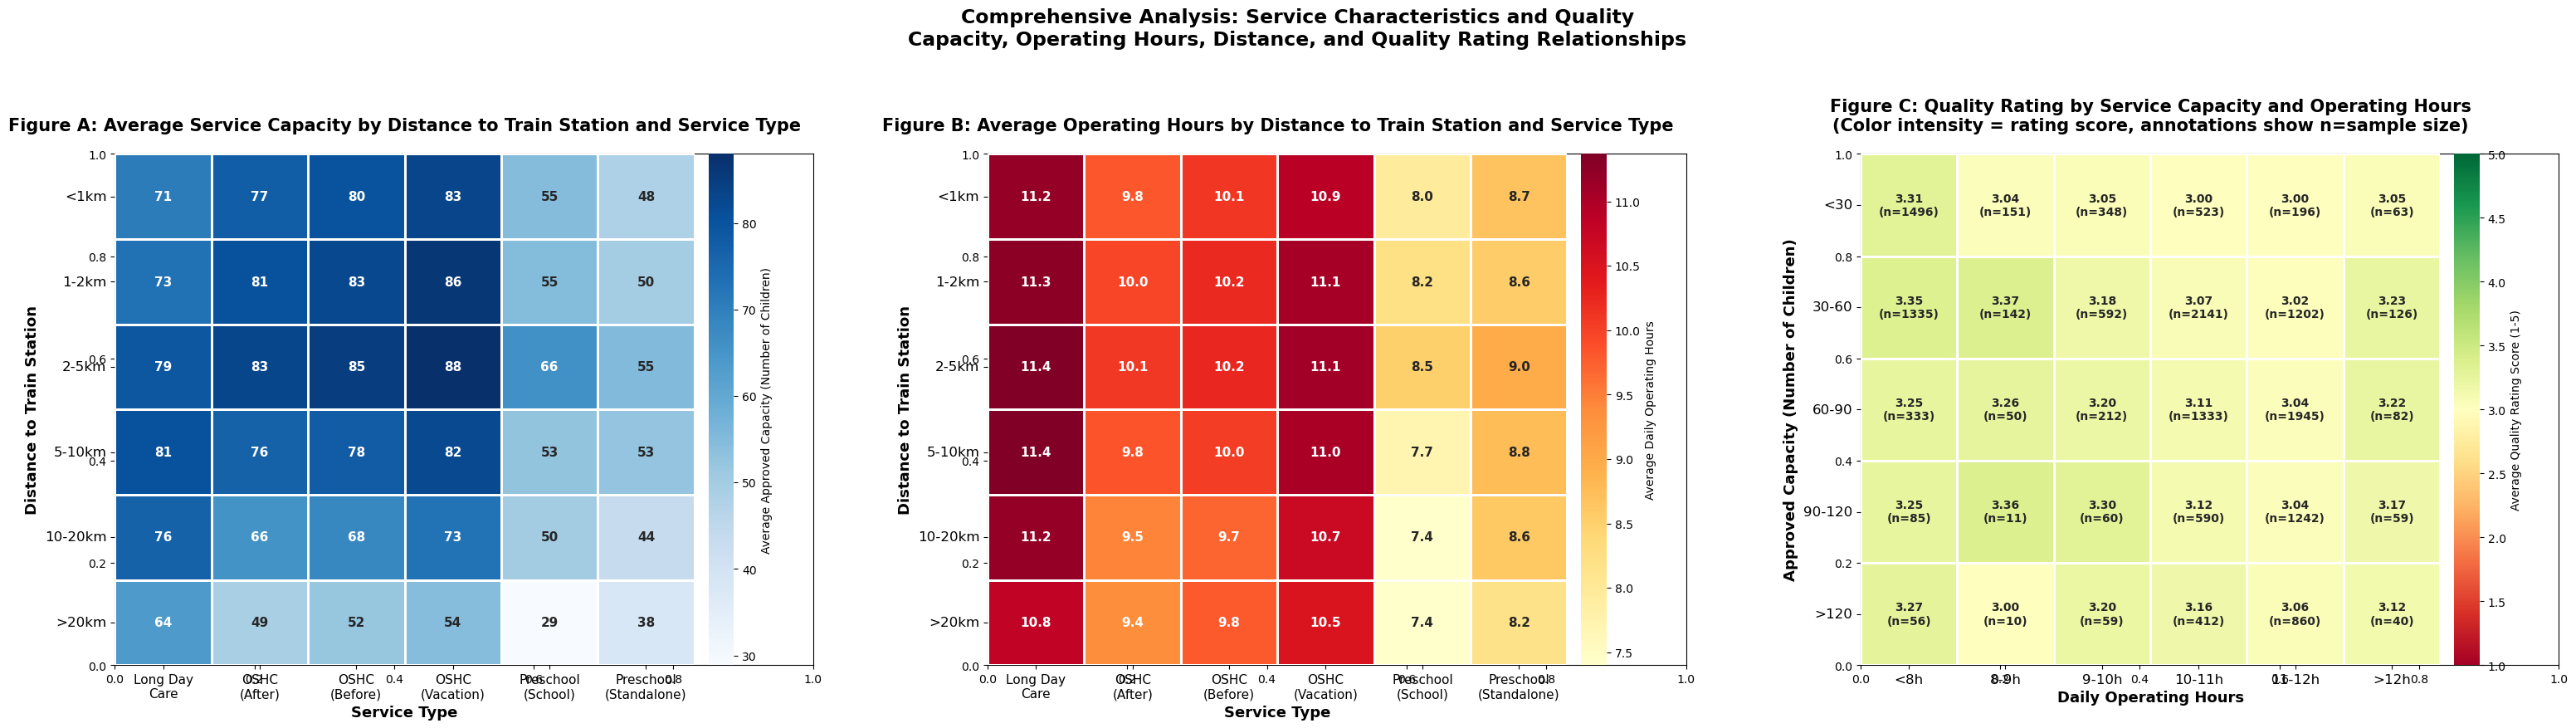

In [36]:
rating_map = {
    'Excellent': 5, 
    'Exceeding NQS': 4, 
    'Meeting NQS': 3, 
    'Working Towards NQS': 2, 
    'Significant Improvement Required': 1
}
df['RatingScore'] = df['OverallRating'].map(rating_map)

df['DistanceGroup'] = pd.cut(
    df['DistanceToTrainStation_km'],
    bins=[0, 1, 2, 5, 10, 20, 100],
    labels=['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']
)

df['CapacityGroup'] = pd.cut(
    df['NumberOfApprovedPlaces'],
    bins=[0, 30, 60, 90, 120, 500],
    labels=['<30', '30-60', '60-90', '90-120', '>120']
)

df['HoursGroup'] = pd.cut(
    df['DailyAvgHours_open'],
    bins=[0, 8, 9, 10, 11, 12, 20],
    labels=['<8h', '8-9h', '9-10h', '10-11h', '11-12h', '>12h']
)

service_type_cols = [
    'Long Day Care',
    'Preschool/Kindergarten - Part of a School',
    'Preschool/Kindergarten - Stand alone',
    'Outside school Hours Care - After School',
    'Outside school Hours Care - Before School',
    'Outside school Hours Care - Vacation Care'
]

long_format_data = []

for _, row in df.iterrows():
    for service_col in service_type_cols:
        if str(row.get(service_col, '')).strip().lower() == 'yes':
            if service_col == 'Long Day Care':
                service_name = 'Long Day\nCare'
            elif service_col == 'Preschool/Kindergarten - Part of a School':
                service_name = 'Preschool\n(School)'
            elif service_col == 'Preschool/Kindergarten - Stand alone':
                service_name = 'Preschool\n(Standalone)'
            elif service_col == 'Outside school Hours Care - After School':
                service_name = 'OSHC\n(After)'
            elif service_col == 'Outside school Hours Care - Before School':
                service_name = 'OSHC\n(Before)'
            elif service_col == 'Outside school Hours Care - Vacation Care':
                service_name = 'OSHC\n(Vacation)'
            else:
                service_name = service_col
            
            long_format_data.append({
                'DistanceGroup': row['DistanceGroup'],
                'ServiceType': service_name,
                'RatingScore': row['RatingScore'],
                'NumberOfApprovedPlaces': row['NumberOfApprovedPlaces'],
                'DailyAvgHours_open': row.get('DailyAvgHours_open', None)
            })

df_long = pd.DataFrame(long_format_data)
df_long = df_long[df_long['DistanceGroup'].notna()]


#pivot1
pivot_capacity = df_long.pivot_table(
    values='NumberOfApprovedPlaces', 
    index='DistanceGroup', 
    columns='ServiceType', 
    aggfunc='mean'
)

#pivot2
pivot_hours = df_long.pivot_table(
    values='DailyAvgHours_open',
    index='DistanceGroup',
    columns='ServiceType',
    aggfunc='mean'
)

#pivot3
df_filtered = df[
    df['CapacityGroup'].notna() & 
    df['HoursGroup'].notna() & 
    df['RatingScore'].notna()
].copy()

pivot_rating_matrix = df_filtered.pivot_table(
    values='RatingScore',
    index='CapacityGroup',
    columns='HoursGroup',
    aggfunc='mean'
)

pivot_count_matrix = df_filtered.pivot_table(
    values='RatingScore',
    index='CapacityGroup',
    columns='HoursGroup',
    aggfunc='count'
)



fig = plt.figure(figsize=(38, 8))  
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.25)  


ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])


ax1 = fig.add_subplot(gs[0])

distance_order = ['<1km', '1-2km', '2-5km', '5-10km', '10-20km', '>20km']

pivot_capacity = pivot_capacity.reindex(distance_order)
pivot_hours = pivot_hours.reindex(distance_order)

sns.heatmap(pivot_capacity, 
            annot=True, 
            fmt='.0f', 
            cmap='Blues',
            cbar_kws={'label': 'Average Approved Capacity (Number of Children)', 'pad': 0.02},
            linewidths=2,
            linecolor='white',
            ax=ax1,
            annot_kws={'size': 11, 'weight': 'bold'})

ax1.set_title('Figure A: Average Service Capacity by Distance to Train Station and Service Type', 
             fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('Service Type', fontsize=13, fontweight='bold')
ax1.set_ylabel('Distance to Train Station', fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=0, labelsize=11)
ax1.tick_params(axis='y', rotation=0, labelsize=12)

ax2 = fig.add_subplot(gs[1])

sns.heatmap(pivot_hours, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Average Daily Operating Hours', 'pad': 0.02},
            linewidths=2,
            linecolor='white',
            ax=ax2,
            annot_kws={'size': 11, 'weight': 'bold'})

ax2.set_title('Figure B: Average Operating Hours by Distance to Train Station and Service Type', 
             fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Service Type', fontsize=13, fontweight='bold')
ax2.set_ylabel('Distance to Train Station', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=0, labelsize=11)
ax2.tick_params(axis='y', rotation=0, labelsize=12)

ax3 = fig.add_subplot(gs[2])

annotations = []
for i in range(len(pivot_rating_matrix.index)):
    row_annots = []
    for j in range(len(pivot_rating_matrix.columns)):
        rating = pivot_rating_matrix.iloc[i, j]
        count = pivot_count_matrix.iloc[i, j]
        
        if pd.notna(rating) and pd.notna(count):
            annot_text = f'{rating:.2f}\n(n={int(count)})'
        else:
            annot_text = ''
        row_annots.append(annot_text)
    annotations.append(row_annots)

capacity_order = ['<30', '30-60', '60-90', '90-120', '>120']
hours_order = ['<8h', '8-9h', '9-10h', '10-11h', '11-12h', '>12h']

pivot_rating_matrix = pivot_rating_matrix.reindex(index=capacity_order, columns=hours_order)
pivot_count_matrix = pivot_count_matrix.reindex(index=capacity_order, columns=hours_order)

sns.heatmap(pivot_rating_matrix, 
            annot=annotations,
            fmt='',
            cmap='RdYlGn',
            center=3.0,
            vmin=1,
            vmax=5,
            cbar_kws={'label': 'Average Quality Rating Score (1-5)', 'pad': 0.02},
            linewidths=2,
            linecolor='white',
            ax=ax3,
            annot_kws={'size': 10, 'weight': 'bold'})

ax3.set_title('Figure C: Quality Rating by Service Capacity and Operating Hours\n(Color intensity = rating score, annotations show n=sample size)', 
             fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Daily Operating Hours', fontsize=13, fontweight='bold')
ax3.set_ylabel('Approved Capacity (Number of Children)', fontsize=13, fontweight='bold')
ax3.tick_params(axis='x', rotation=0, labelsize=12)
ax3.tick_params(axis='y', rotation=0, labelsize=12)


fig.suptitle('Comprehensive Analysis: Service Characteristics and Quality\nCapacity, Operating Hours, Distance, and Quality Rating Relationships',
            fontsize=17, fontweight='bold', y=1.1)

plt.savefig('three_panel_heatmap_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

